# PROJECT 2

## Table of contents
<a id='table_of_contents'></a>

0. [Import libraries](#import_libraries)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Benchmark model](#Benchmark_model)
    4.1. [Train-test split](#Train-test_split)
    4.2. [Fit a model to the data](#Fit_a_model_to_the_data)
    4.3. [Model evaluation](#Model_evaluation)
5. [Feature engineering](#Feature_engineering)
6. [Model training](#Model_training)
    7.1. [Decision Tree](#Decision_tree)
    7.2. [KNN](#KNN)
    7.3. [Comparing algorithm performances](#Comparing_algorithm_performances)
7. [Tuning](#Tuning)


### 0.Import libraries  <a id='import_libraries'></a>



[Back_to_top](#table_of_contents)

In [43]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy
import sklearn

### 1.Import Data <a id='import_data'></a>
[Back_to_top](#table_of_contents)

In [44]:
hcc_data = pd.read_csv("hcc_dataset.csv")

In [45]:
pd.set_option('display.max_columns',None)

In [46]:
print(hcc_data.shape)
hcc_data.head()

(165, 50)


Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female        ?      No    No    No    No   Yes       Yes       ?       ?   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

  Diabetes Obesity Hemochro  AHT  CRI HIV NASH Varices Spleno  PHT PVT  \
0      Yes       ?      Yes   No   No  No   No     Yes     No   No  No   
1      Yes      No       No  Yes   No  No   No     Yes     No   No  No   
2       No      No       No  Yes  Yes  No   No      No     No  Yes  No   
3      Yes      No       No  Yes   No  No   No      No     No   No  No   
4       No      No       No  Yes  Yes  No   No      No     No   No  No   

  Metastasis Hallmark  Age Grams_day Packs_year          PS Encephalopathy  \
0         No      Yes   67       137         15      Active            NaN   
1         No      Yes   62         0          ?      Active            NaN   
2        Yes      Yes   78        50         50  Ambulatory            NaN   
3        Yes      Yes   77        40         30      Active            NaN   
4         No      Yes   76       100         30      Active            NaN   

  Ascites   INR   AFP Hemoglobin    MCV Leucocytes Platelets Albumin  \
0     NaN  1.53    95       13.7  106.6        4.9        99     3.4   
1     NaN     ?     ?          ?      ?          ?         ?       ?   
2    Mild  0.96   5.8        8.9   79.8        8.4       472     3.3   
3     NaN  0.95  2440       13.4   97.1          9       279     3.7   
4     NaN  0.94    49       14.3   95.1        6.4       199     4.1   

  Total_Bil  ALT  AST  GGT  ALP   TP Creatinine Nodules Major_Dim Dir_Bil  \
0       2.1   34   41  183  150  7.1        0.7       1       3.5     0.5   
1         ?    ?    ?    ?    ?    ?          ?       1       1.8       ?   
2       0.4   58   68  202  109    7        2.1       5        13     0.1   
3       0.4   16   64   94  174  8.1       1.11       2      15.7     0.2   
4       0.7  147  306  173  109  6.9        1.8       1         9       ?   

  Iron Sat Ferritin  Class  
0    ?   ?        ?  Lives  
1    ?   ?        ?  Lives  
2   28   6       16  Lives  
3    ?   ?        ?   Dies  
4   59  15       22  Lives

### 2.Data exploration  <a id='data_exploration'></a>

[Back_to_top](#table_of_contents)

In [47]:
hcc_data.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [48]:
hcc_data.dtypes

Gender            object
Symptoms          object
Alcohol           object
HBsAg             object
HBeAg             object
HBcAb             object
HCVAb             object
Cirrhosis         object
Endemic           object
Smoking           object
Diabetes          object
Obesity           object
Hemochro          object
AHT               object
CRI               object
HIV               object
NASH              object
Varices           object
Spleno            object
PHT               object
PVT               object
Metastasis        object
Hallmark          object
Age                int64
Grams_day         object
Packs_year        object
PS                object
Encephalopathy    object
Ascites           object
INR               object
AFP               object
Hemoglobin        object
MCV               object
Leucocytes        object
Platelets         object
Albumin           object
Total_Bil         object
ALT               object
AST               object
GGT               object


In [66]:
numerical_columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']
for col in numerical_columns:
    # Verificar se a coluna é de tipo object, indicando possível presença de strings
    if hcc_data[col].dtype == 'object' :
        hcc_data[col]=pd.to_numeric(hcc_data[col].str.replace(' ', ''), errors='coerce')
    else:
        # Se não for object, converte diretamente
        hcc_data[col]=pd.to_numeric(hcc_data[col], errors='coerce')

In [67]:
hcc_data.dtypes

Gender             object
Symptoms           object
Alcohol            object
HBsAg              object
HBeAg              object
HBcAb              object
HCVAb              object
Cirrhosis          object
Endemic            object
Smoking            object
Diabetes           object
Obesity            object
Hemochro           object
AHT                object
CRI                object
HIV                object
NASH               object
Varices            object
Spleno             object
PHT                object
PVT                object
Metastasis         object
Hallmark           object
Age                 int64
Grams_day         float64
Packs_year        float64
PS                 object
Encephalopathy     object
Ascites            object
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
Albumin           float64
Total_Bil         float64
ALT               float64
AST         

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Grams_day'}>,
        <Axes: title={'center': 'Packs_year'}>,
        <Axes: title={'center': 'INR'}>, <Axes: title={'center': 'AFP'}>],
       [<Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Leucocytes'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'Total_Bil'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'GGT'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'Creatinine'}>,
        <Axes: title={'center': 'Nodules'}>,
        <Axes: title={'center': 'Major_Dim'}>,
        <Axes: title={'center': 'Dir_Bil'}>],
       [<Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Sat'}>,
        <Axes: title={'center': 'Ferritin'}>, <Axes: >

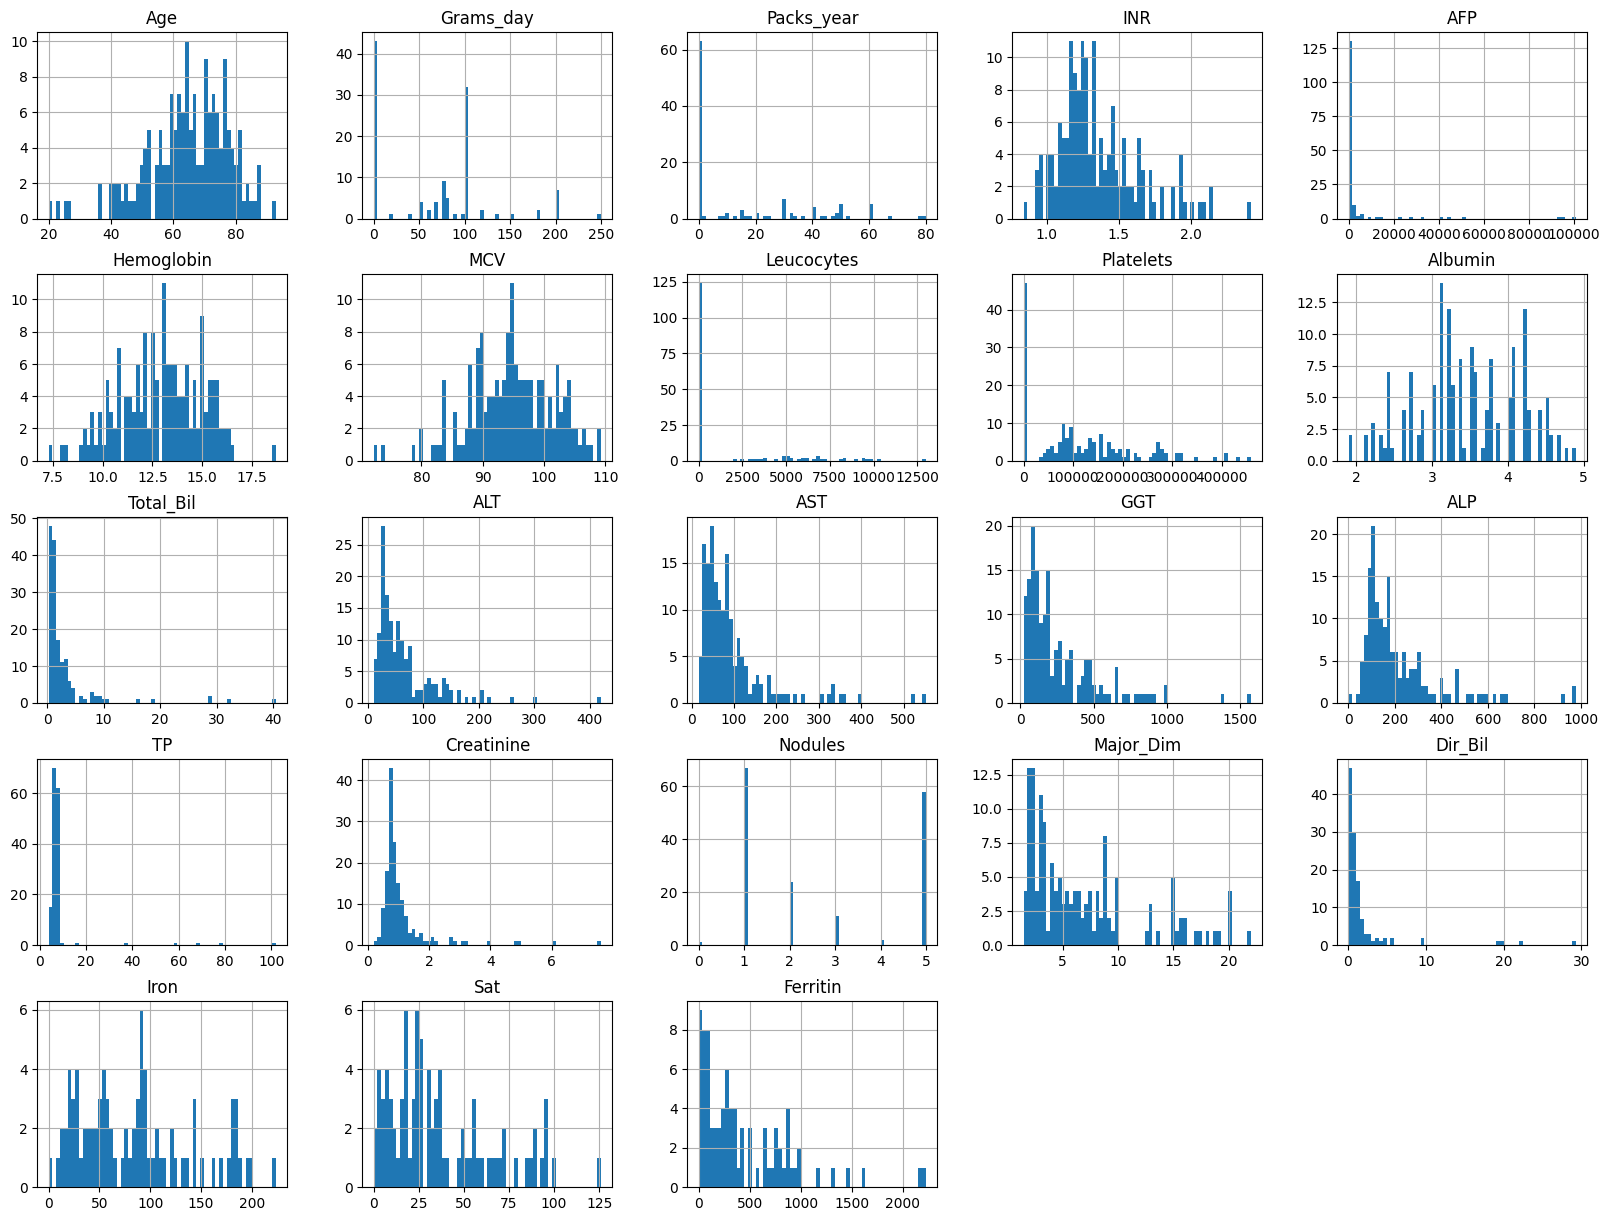

In [68]:
hcc_data.hist(figsize=(20,15),bins=60)

<Axes: xlabel='index', ylabel='Grams_day'>

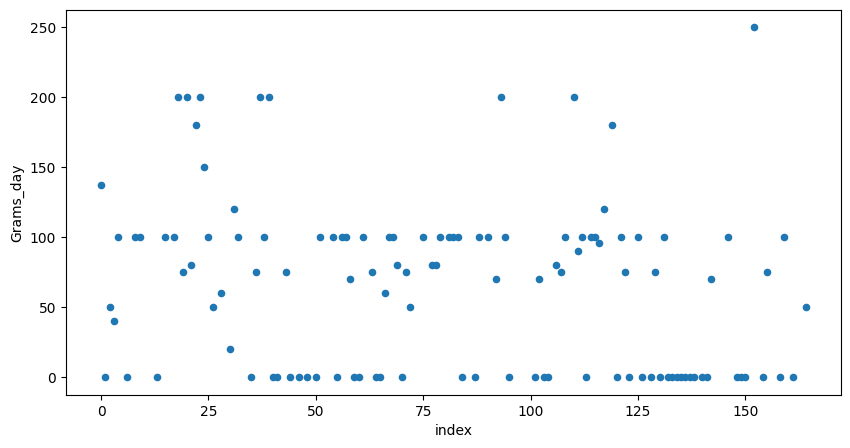

In [69]:
hcc_data.reset_index().plot(kind='scatter',y='Grams_day',x='index',figsize=(10,5))

<Axes: xlabel='Grams_day'>

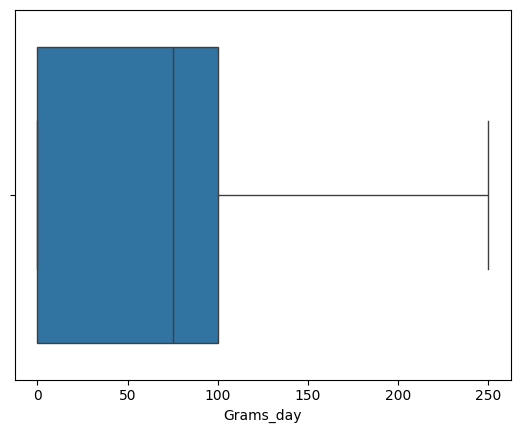

In [70]:
sns.boxplot(x=hcc_data['Grams_day'])

<Axes: xlabel='index', ylabel='Packs_year'>

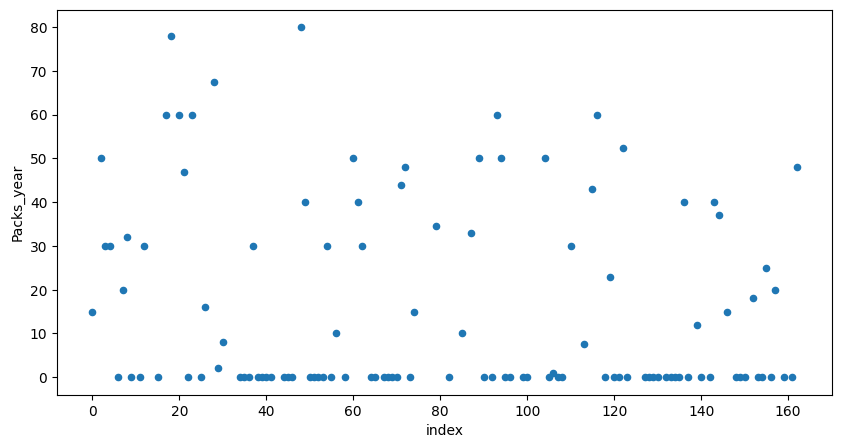

In [71]:
hcc_data.reset_index().plot(kind='scatter',y='Packs_year',x='index',figsize=(10,5))

In [72]:
hcc_data[hcc_data['Packs_year']>100].shape

(0, 50)

<Axes: xlabel='index', ylabel='INR'>

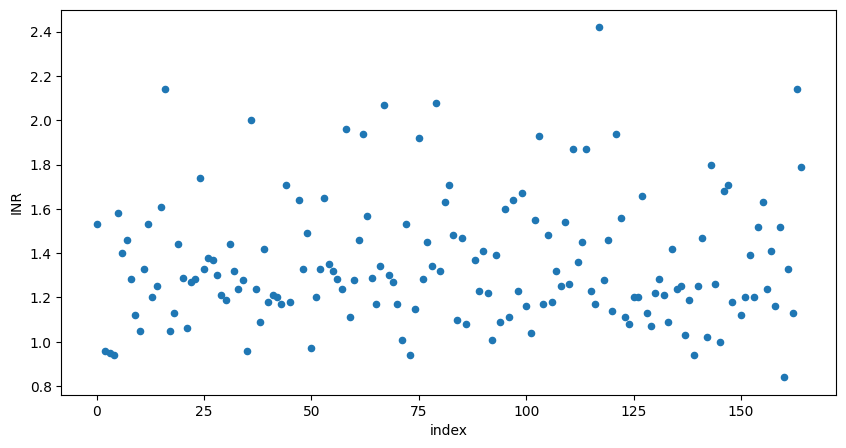

In [73]:
hcc_data.reset_index().plot(kind='scatter',y='INR',x='index',figsize=(10,5))

In [74]:
hcc_data[hcc_data['Packs_year']>2.5].shape

(48, 50)

<Axes: xlabel='index', ylabel='AFP'>

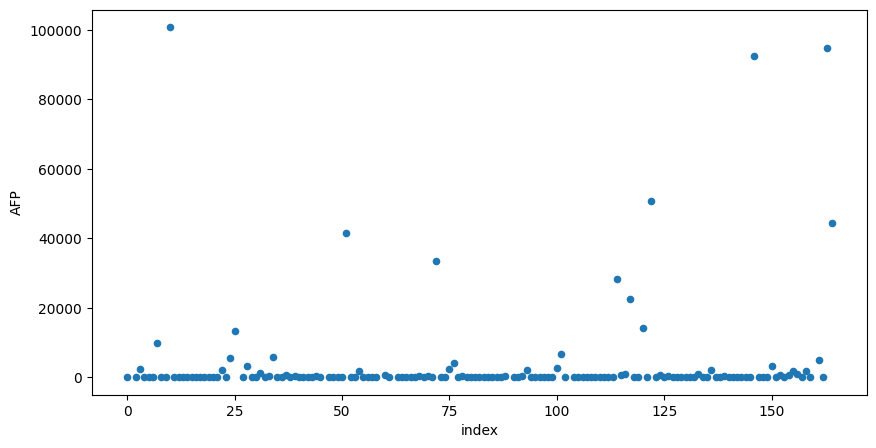

In [75]:
hcc_data.reset_index().plot(kind='scatter',y='AFP',x='index',figsize=(10,5))

In [76]:
hcc_data[hcc_data['Packs_year']>500].shape

(0, 50)

<Axes: xlabel='index', ylabel='Hemoglobin'>

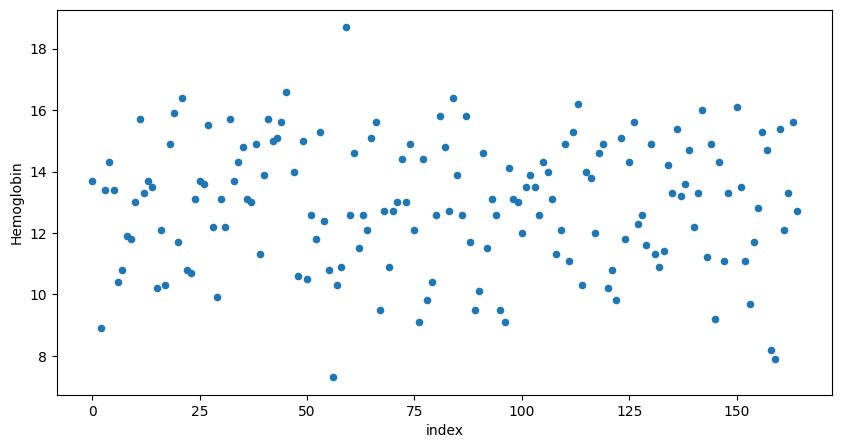

In [77]:
hcc_data.reset_index().plot(kind='scatter',y='Hemoglobin',x='index',figsize=(10,5))

In [78]:
hcc_data['Hemoglobin'].mean()

12.929012345679013

In [79]:
hcc_data[hcc_data['Hemoglobin']<10].shape

(14, 50)

In [80]:
hcc_data[hcc_data['Hemoglobin']>17.2].shape

(1, 50)

<Axes: xlabel='index', ylabel='MCV'>

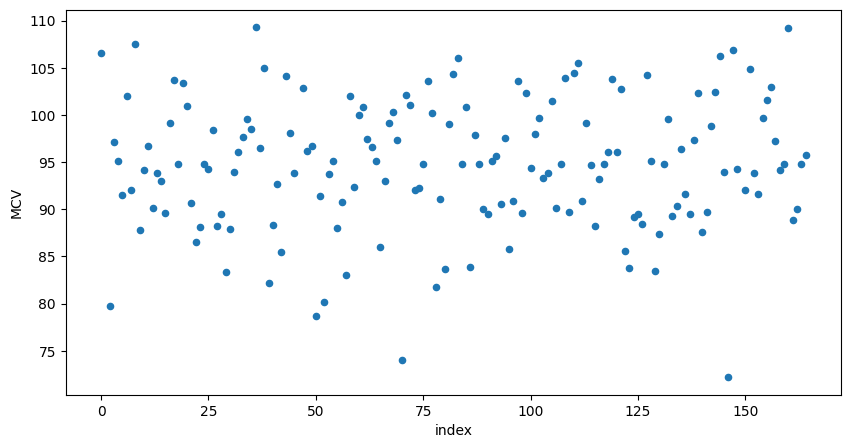

In [81]:
hcc_data.reset_index().plot(kind='scatter',y='MCV',x='index',figsize=(10,5))

In [82]:
hcc_data[hcc_data['MCV']>111].shape

(0, 50)

In [83]:
hcc_data[hcc_data['MCV']<71].shape

(0, 50)

<Axes: xlabel='index', ylabel='Leucocytes'>

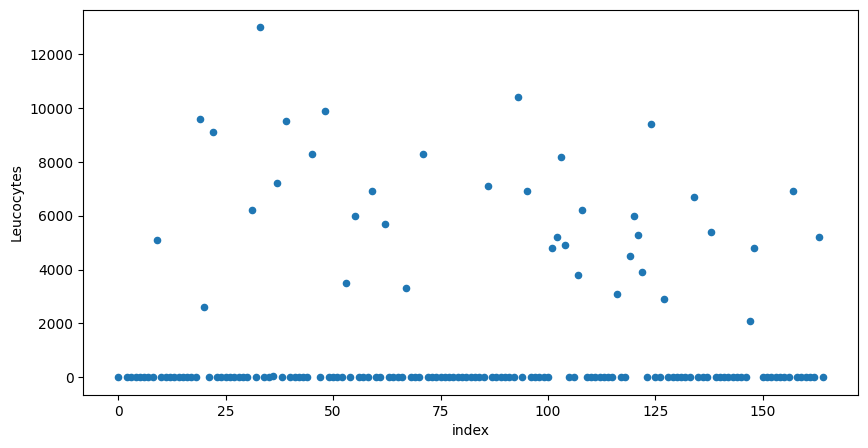

In [84]:
hcc_data.reset_index().plot(kind='scatter',y='Leucocytes',x='index',figsize=(10,5))

In [85]:
hcc_data[hcc_data['Leucocytes']>11000].shape

(1, 50)

In [86]:
hcc_data['Leucocytes'].describe()

count      162.000000
mean      1473.961549
std       2909.106006
min          2.200000
25%          5.100000
50%          7.200000
75%         19.525000
max      13000.000000
Name: Leucocytes, dtype: float64

In [87]:
hcc_data[hcc_data['Leucocytes']<200].shape

(124, 50)

<Axes: xlabel='index', ylabel='Platelets'>

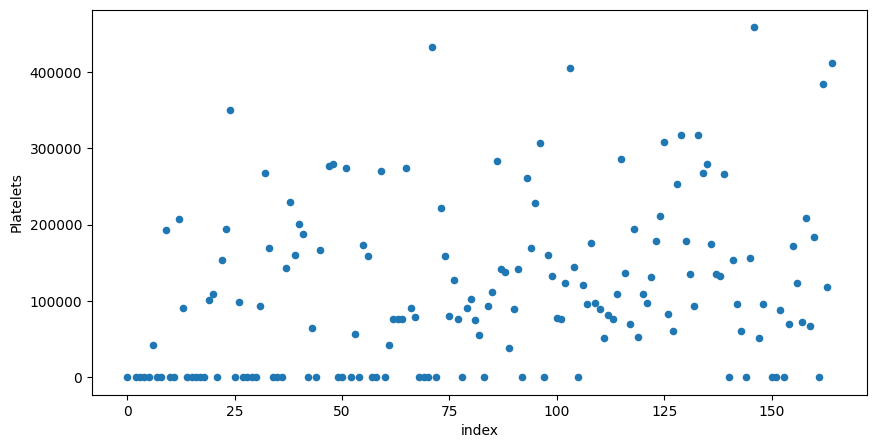

In [88]:
hcc_data.reset_index().plot(kind='scatter',y='Platelets',x='index',figsize=(10,5))

In [89]:
hcc_data['Platelets'].describe()

count       162.000000
mean     113206.442654
std      107118.632481
min           1.710000
25%         255.750000
50%       93000.000000
75%      171500.000000
max      459000.000000
Name: Platelets, dtype: float64

In [90]:
hcc_data[hcc_data['Platelets']<50000].shape

(50, 50)

<Axes: xlabel='index', ylabel='Albumin'>

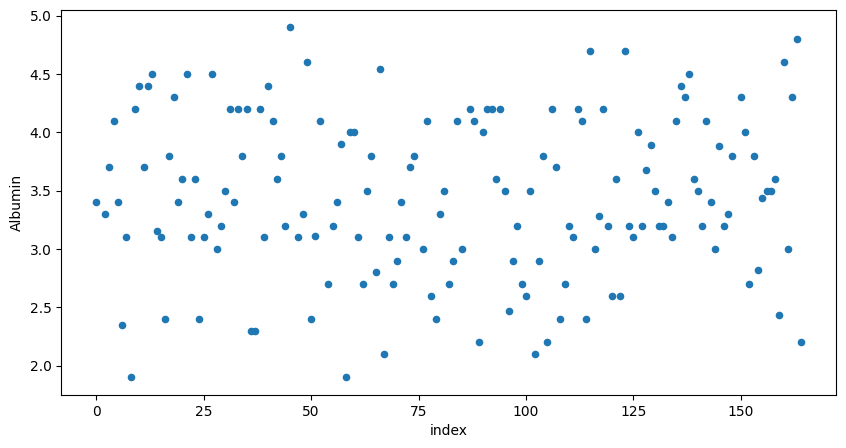

In [93]:
hcc_data.reset_index().plot(kind='scatter',y='Albumin',x='index',figsize=(10,5))

In [95]:
hcc_data[hcc_data['Albumin']<2.0].shape

(2, 50)

<Axes: xlabel='index', ylabel='Total_Bil'>

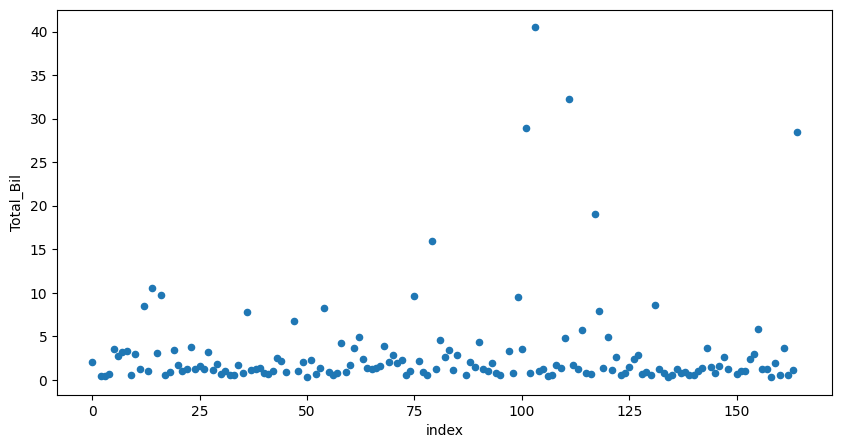

In [96]:
hcc_data.reset_index().plot(kind='scatter',y='Total_Bil',x='index',figsize=(10,5))

In [97]:
hcc_data[hcc_data['Total_Bil']>20].shape

(4, 50)

<Axes: xlabel='index', ylabel='ALT'>

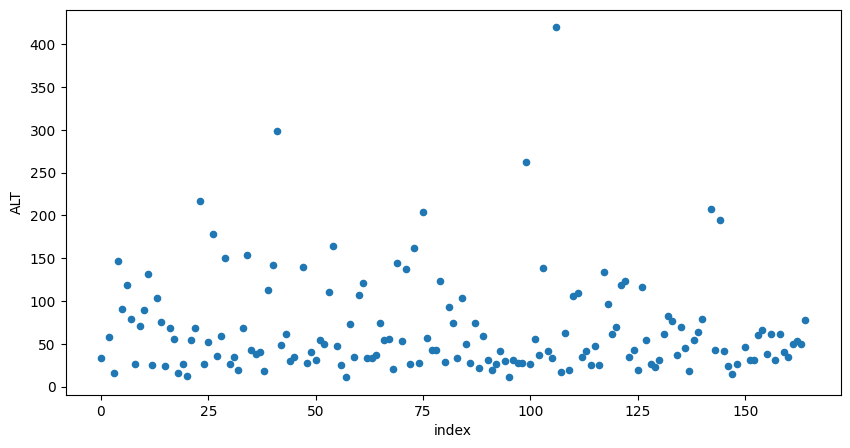

In [98]:
hcc_data.reset_index().plot(kind='scatter',y='ALT',x='index',figsize=(10,5))

In [99]:
hcc_data['ALT'].describe()

count    161.000000
mean      67.093168
std       57.539747
min       11.000000
25%       31.000000
50%       50.000000
75%       78.000000
max      420.000000
Name: ALT, dtype: float64

In [100]:
hcc_data[hcc_data['ALT']>300].shape

(1, 50)

<Axes: xlabel='index', ylabel='AST'>

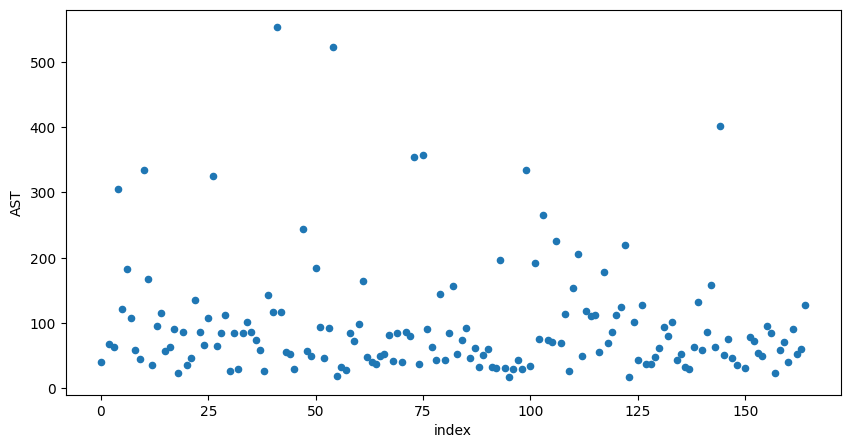

In [101]:
hcc_data.reset_index().plot(kind='scatter',y='AST',x='index',figsize=(10,5))

In [102]:
hcc_data['AST'].describe()

count    162.000000
mean      96.382716
std       87.484241
min       17.000000
25%       46.250000
50%       71.000000
75%      110.250000
max      553.000000
Name: AST, dtype: float64

In [103]:
hcc_data[hcc_data['AST']>400].shape

(3, 50)

In [104]:
hcc_data[hcc_data['AST']<25].shape

(5, 50)

<Axes: xlabel='index', ylabel='GGT'>

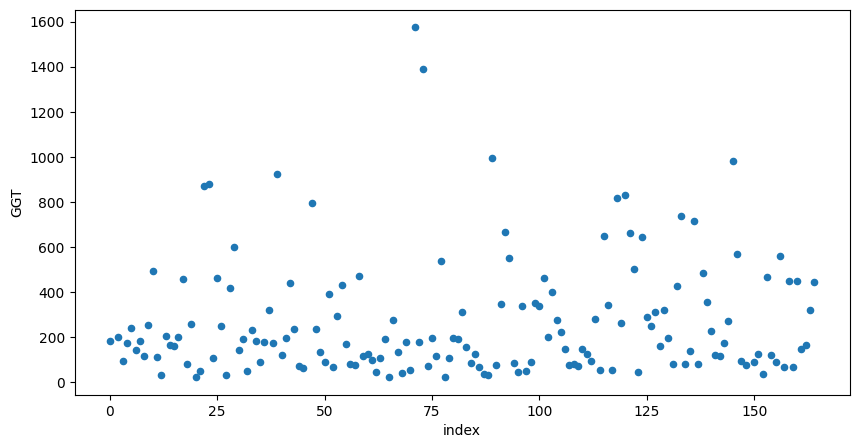

In [105]:
hcc_data.reset_index().plot(kind='scatter',y='GGT',x='index',figsize=(10,5))

In [106]:
hcc_data['GGT'].describe()

count     162.000000
mean      268.026543
std       258.750319
min        23.000000
25%        91.250000
50%       179.500000
75%       345.250000
max      1575.000000
Name: GGT, dtype: float64

In [107]:
hcc_data[hcc_data['GGT']>=1000].shape

(2, 50)

<Axes: xlabel='index', ylabel='ALP'>

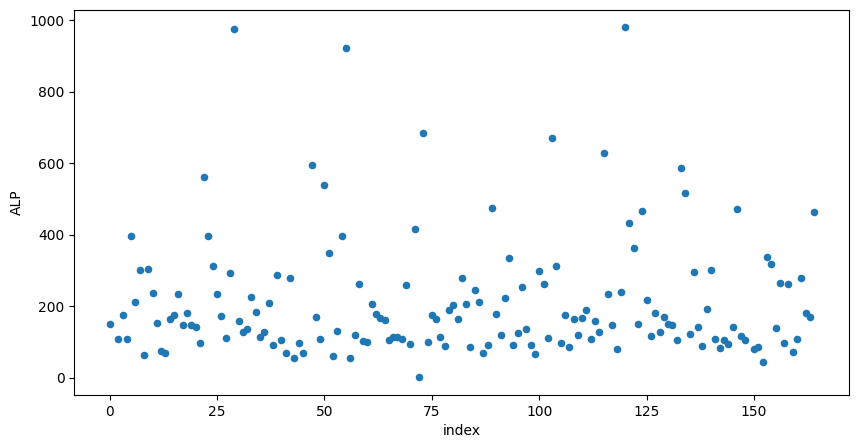

In [108]:
hcc_data.reset_index().plot(kind='scatter',y='ALP',x='index',figsize=(10,5))

In [109]:
hcc_data['ALP'].describe()

count    162.000000
mean     212.211605
std      167.943548
min        1.280000
25%      108.250000
50%      162.000000
75%      261.500000
max      980.000000
Name: ALP, dtype: float64

In [110]:
hcc_data[hcc_data['ALP']<30].shape

(1, 50)

In [111]:
hcc_data[hcc_data['ALP']>800].shape

(3, 50)

<Axes: xlabel='index', ylabel='Creatinine'>

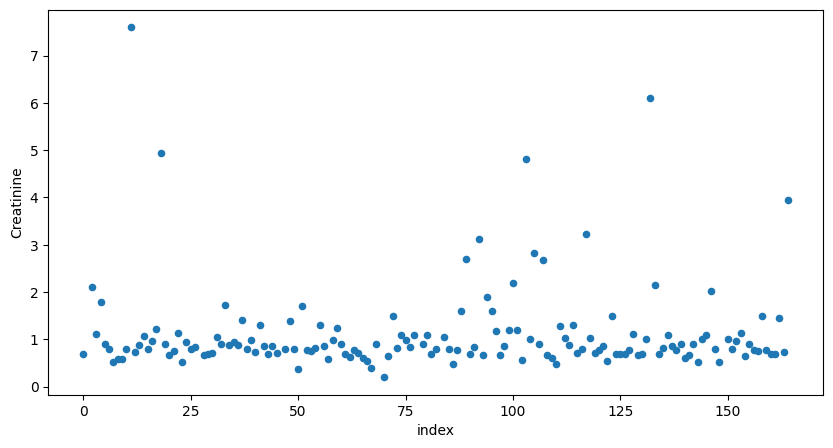

In [112]:
hcc_data.reset_index().plot(kind='scatter',y='Creatinine',x='index',figsize=(10,5))

In [113]:
hcc_data['Creatinine'].describe()

count    158.000000
mean       1.127089
std        0.955856
min        0.200000
25%        0.700000
50%        0.850000
75%        1.100000
max        7.600000
Name: Creatinine, dtype: float64

In [114]:
hcc_data[hcc_data['Creatinine']>4].shape

(4, 50)

<Axes: xlabel='index', ylabel='TP'>

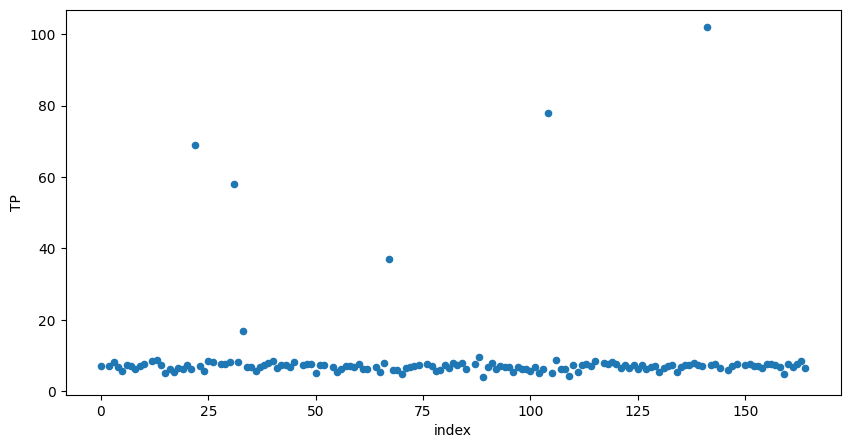

In [115]:
hcc_data.reset_index().plot(kind='scatter',y='TP',x='index',figsize=(10,5))

In [116]:
hcc_data['TP'].describe()

count    154.000000
mean       8.961039
std       11.728739
min        3.900000
25%        6.300000
50%        7.050000
75%        7.575000
max      102.000000
Name: TP, dtype: float64

In [117]:
hcc_data[hcc_data['TP']>11].shape

(6, 50)

<Axes: xlabel='index', ylabel='Major_Dim'>

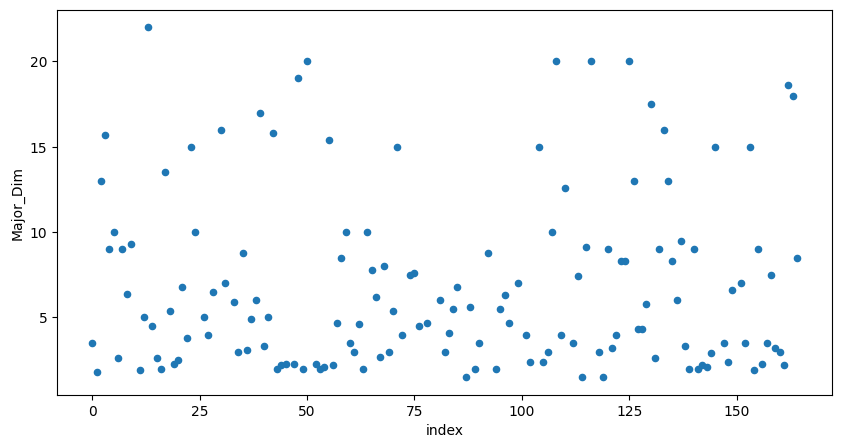

In [118]:
hcc_data.reset_index().plot(kind='scatter',y='Major_Dim',x='index',figsize=(10,5))

In [119]:
hcc_data[hcc_data['Major_Dim']>20].shape

(1, 50)

<Axes: xlabel='index', ylabel='Dir_Bil'>

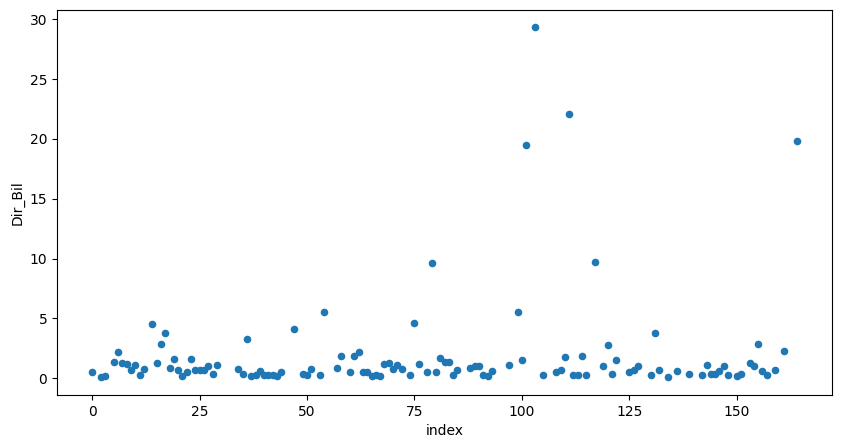

In [120]:
hcc_data.reset_index().plot(kind='scatter',y='Dir_Bil',x='index',figsize=(10,5))

In [121]:
hcc_data[hcc_data['Dir_Bil']>7].shape

(6, 50)

<Axes: xlabel='index', ylabel='Iron'>

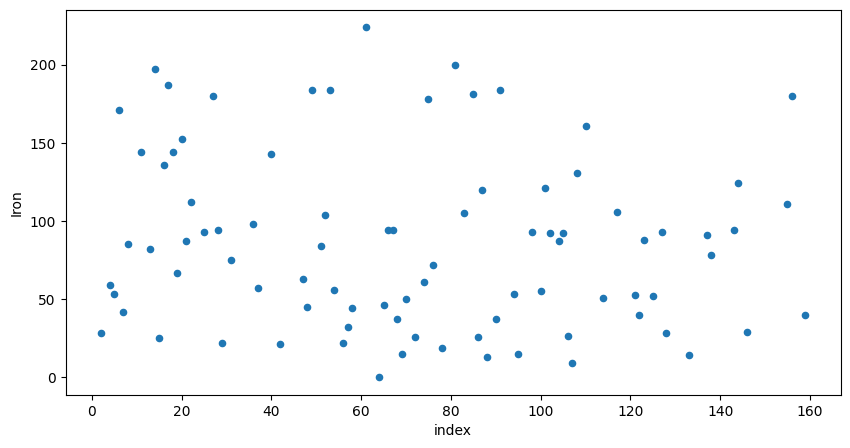

In [122]:
hcc_data.reset_index().plot(kind='scatter',y='Iron',x='index',figsize=(10,5))

In [123]:
hcc_data[hcc_data['Iron']<10].shape

(2, 50)

In [124]:
hcc_data[hcc_data['Iron']>200].shape

(1, 50)

<Axes: xlabel='index', ylabel='Sat'>

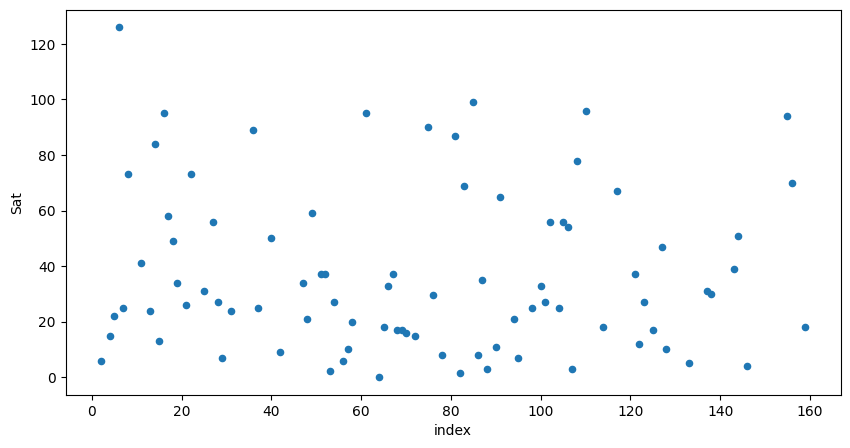

In [125]:
hcc_data.reset_index().plot(kind='scatter',y='Sat',x='index',figsize=(10,5))

In [126]:
hcc_data[hcc_data['Sat']>90].shape

(6, 50)

<Axes: xlabel='index', ylabel='Ferritin'>

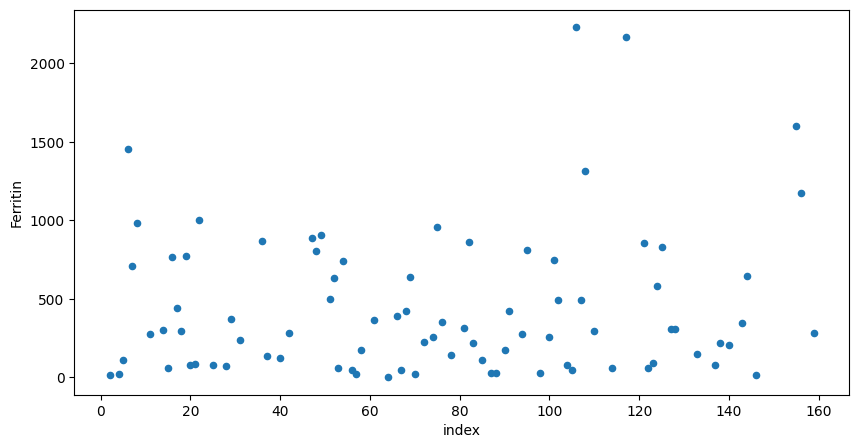

In [127]:
hcc_data.reset_index().plot(kind='scatter',y='Ferritin',x='index',figsize=(10,5))

In [128]:
hcc_data['Ferritin'].describe()

count      85.000000
mean      438.997647
std       457.114454
min         0.000000
25%        84.000000
50%       295.000000
75%       706.000000
max      2230.000000
Name: Ferritin, dtype: float64

In [129]:
hcc_data[hcc_data['Ferritin']>1000].shape

(7, 50)

### 3.Data cleaning  <a id='data_cleaning'></a>

[Back_to_top](#table_of_contents)

In [130]:
median_value = hcc_data[hcc_data['Grams_day'] <300]['Grams_day'].median()
hcc_data.loc[hcc_data['Grams_day'] >= 300, 'Grams_day'] = median_value

In [131]:
median_value = hcc_data[hcc_data['Packs_year'] < 100]['Packs_year'].median()
hcc_data.loc[hcc_data['Packs_year'] >= 100, 'Packs_year'] = median_value

In [132]:
median_value = hcc_data[hcc_data['INR'] < 2.5]['INR'].median()
hcc_data.loc[hcc_data['INR'] >= 2.5, 'INR'] = median_value

In [133]:
median_value = hcc_data[hcc_data['AFP'] < 125000]['AFP'].median()
hcc_data.loc[hcc_data['AFP'] >= 125000, 'AFP'] = median_value

<Axes: >

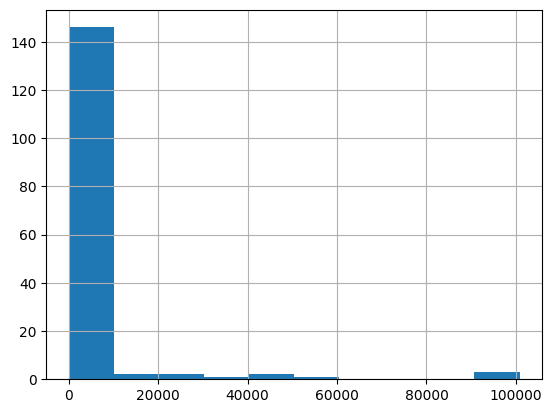

In [134]:
hcc_data['AFP'].hist()

In [135]:
median_value = hcc_data[hcc_data['Hemoglobin'] > 6]['Hemoglobin'].median()
hcc_data.loc[hcc_data['Hemoglobin'] <= 6, 'Hemoglobin'] = median_value

In [136]:
median_value = hcc_data[(hcc_data['MCV'] > 71) & (hcc_data['MCV'] < 111)]['MCV'].median()
hcc_data.loc[(hcc_data['MCV'] <= 71 )|(hcc_data['MCV'] >=111 ), 'MCV'] = median_value

In [137]:
median_value = hcc_data[hcc_data['Total_Bil'] < 20]['Total_Bil'].median()
hcc_data.loc[hcc_data['Total_Bil'] >= 20, 'Total_Bil'] = median_value

In [138]:
median_value = hcc_data[hcc_data['AST'] < 500]['AST'].median()
hcc_data.loc[hcc_data['AST'] >= 500, 'AST'] = median_value

In [139]:
median_value = hcc_data[hcc_data['GGT'] < 1000]['GGT'].median()
hcc_data.loc[hcc_data['GGT'] >= 1000, 'GGT'] = median_value

In [140]:
median_value = hcc_data[(hcc_data['ALP'] > 30) & (hcc_data['ALP'] < 800)]['ALP'].median()
hcc_data.loc[(hcc_data['ALP'] <= 30 )|(hcc_data['ALP'] >=800 ), 'ALP'] = median_value

In [141]:
median_value = hcc_data[hcc_data['Creatinine'] < 4]['Creatinine'].median()
hcc_data.loc[hcc_data['Creatinine'] >= 4, 'Creatinine'] = median_value

In [142]:
median_value = hcc_data[hcc_data['TP'] < 20]['TP'].median()
hcc_data.loc[hcc_data['TP'] >= 20, 'TP'] = median_value

In [143]:
median_value = hcc_data[hcc_data['Major_Dim'] < 20]['Major_Dim'].median()
hcc_data.loc[hcc_data['Major_Dim'] >= 20, 'Major_Dim'] = median_value

In [144]:
median_value = hcc_data[hcc_data['Dir_Bil'] < 18]['Dir_Bil'].median()
hcc_data.loc[hcc_data['Dir_Bil'] >= 18, 'Dir_Bil'] = median_value

In [145]:
median_value = hcc_data[(hcc_data['Iron'] > 10) & (hcc_data['Iron'] < 200)]['Iron'].median()
hcc_data.loc[(hcc_data['Iron'] <= 10 )|(hcc_data['Iron'] >=200 ), 'Iron'] = median_value

In [146]:
median_value = hcc_data[(hcc_data['Ferritin'] > 10) & (hcc_data['Ferritin'] < 1250)]['Ferritin'].median()
hcc_data.loc[(hcc_data['Ferritin'] <= 10 )|(hcc_data['Ferritin'] >=1250 ), 'Ferritin'] = median_value

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Grams_day'}>,
        <Axes: title={'center': 'Packs_year'}>,
        <Axes: title={'center': 'INR'}>, <Axes: title={'center': 'AFP'}>],
       [<Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Leucocytes'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'Total_Bil'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'GGT'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'Creatinine'}>,
        <Axes: title={'center': 'Nodules'}>,
        <Axes: title={'center': 'Major_Dim'}>,
        <Axes: title={'center': 'Dir_Bil'}>],
       [<Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Sat'}>,
        <Axes: title={'center': 'Ferritin'}>, <Axes: >

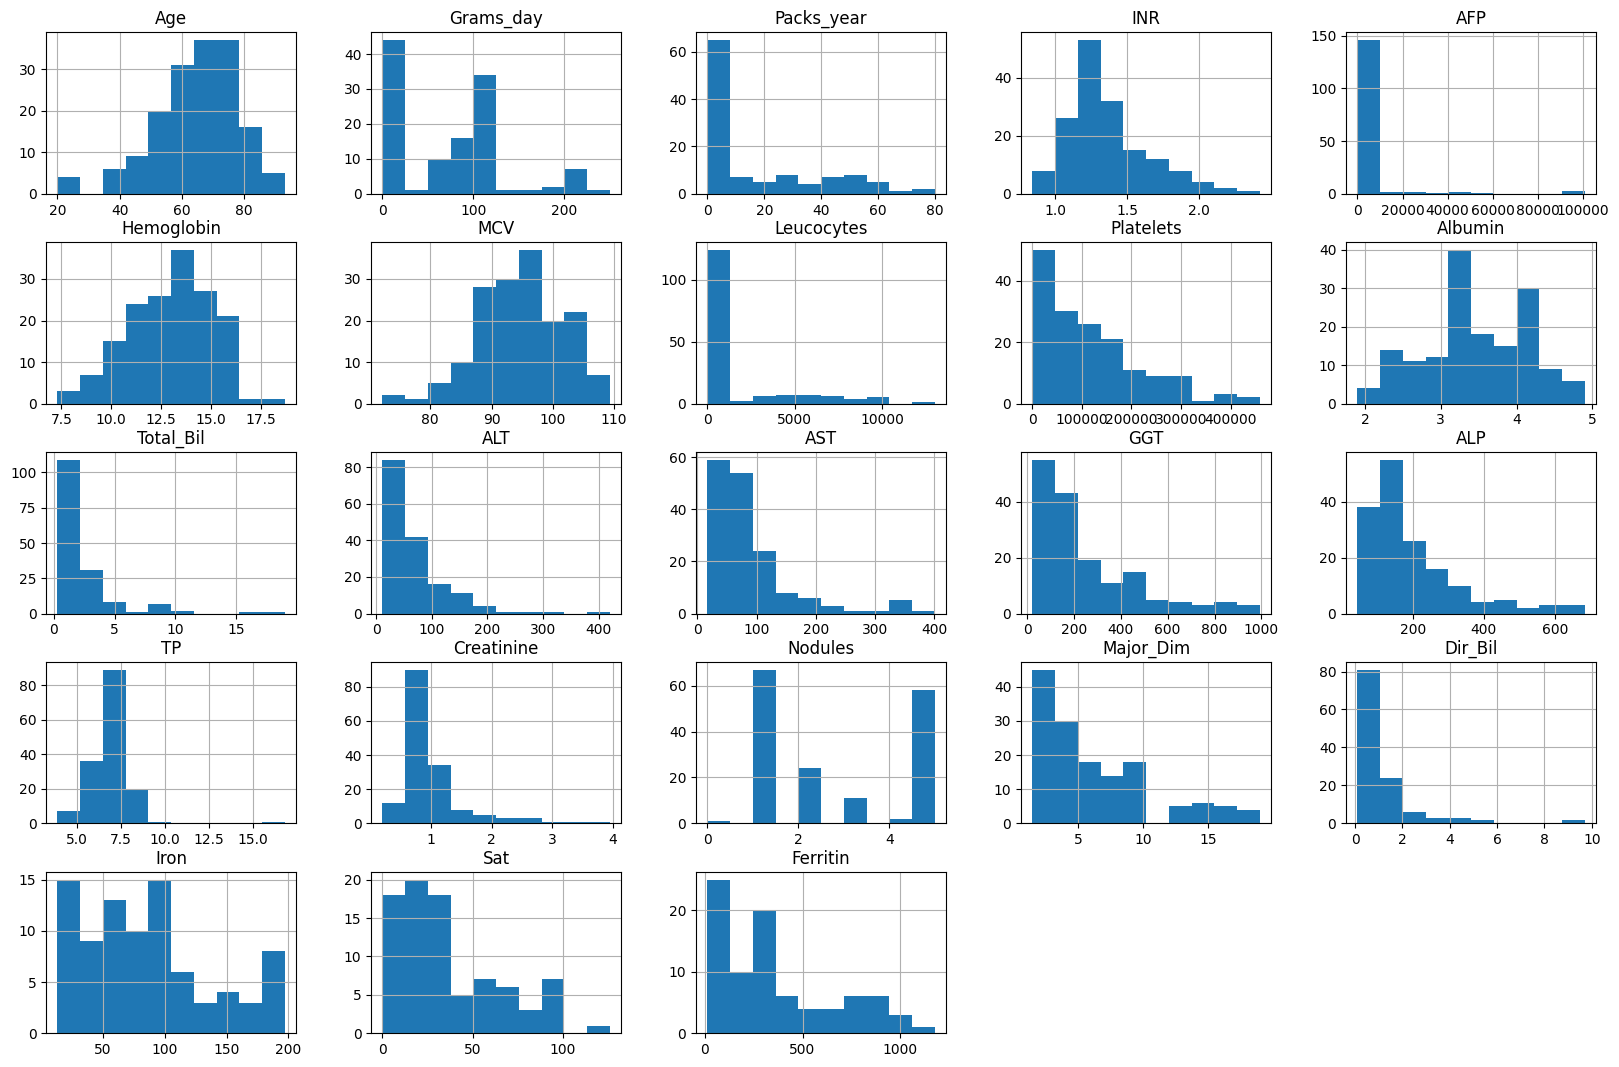

In [147]:
hcc_data.hist(figsize=(20,13))

In [148]:
hcc_data.replace('?', np.nan, inplace=True)

In [149]:
mask = ((hcc_data['Class'] == 'Lives') | (hcc_data['Class'] == 'Dies'))
hcc_data.loc[mask,'Encephalopathy'] = hcc_data.loc[mask,'Encephalopathy'].fillna('Not Applicable')
hcc_data.loc[mask,'Ascites'] = hcc_data.loc[mask,'Ascites'].fillna('Not Applicable')

In [150]:
hcc_data.isna().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     0
Ascites            0
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
Albumin            6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

In [151]:
def impute_missing_data(data):
    for column in data.columns:
        if data[column].dtype == 'object':  # Para dados categóricos
            # Preencher com a moda
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value,inplace=True)
        else:  # Para dados numéricos
            # Preencher com a mediana
            median_value = data[column].median()
            data[column].fillna(median_value,inplace=True)

# Aplicar a função ao dataset
impute_missing_data(hcc_data)


C:\Users\catar\AppData\Local\Temp\ipykernel_21804\992650362.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value,inplace=True)
C:\Users\catar\AppData\Local\Temp\ipykernel_21804\992650362.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [152]:
hcc_data.isna().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
Albumin           0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


### 4. Benchmark models <a id='Benchmark_model'></a>

[Back_to_top](#table_of_contents)

In [153]:
data_benchmark = hcc_data.copy()

In [154]:
data_benchmark['Class'].value_counts()

Class
Lives    102
Dies      63
Name: count, dtype: int64

In [155]:
# Remover espaços extras
data_benchmark['Class'] = data_benchmark['Class'].str.strip()

# Padronizar a capitalização
data_benchmark['Class'] = data_benchmark['Class'].str.title() 
# Verificar valores únicos antes do mapeamento
print("Valores únicos antes do mapeamento:", data_benchmark['Class'].unique())


Valores únicos antes do mapeamento: ['Lives' 'Dies']


In [156]:
# Aplicar o mapeamento
data_benchmark['Class'] = data_benchmark['Class'].map({'Dies': 0, 'Lives': 1})

# Verificar valores únicos após o mapeamento
print("Valores únicos após o mapeamento:", data_benchmark['Class'].unique())

Valores únicos após o mapeamento: [1 0]


In [157]:
data_benchmark['Class'].value_counts()

Class
1    102
0     63
Name: count, dtype: int64

#### 4.1 Train-tes split <a id='Train-test_split'></a>

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X = data_benchmark.drop(['Class'],axis=1)
y = data_benchmark['Class']

In [160]:
#onde-hote encode
X = pd.get_dummies(X)

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [162]:
# Padronizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

#### 4.2 Fit a model to the data<a id='Fit_a_model_to_the_data'></a>

##### 4.2.1 Random Forest Model

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
forest = RandomForestClassifier()

In [216]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [217]:
forest.score(X_test,y_test)

0.6363636363636364

In [218]:
# fazer o mesmo procedimento mas com os dados padronizados 

In [219]:
forest2 = RandomForestClassifier()

In [220]:
forest2.fit(X_train_s,y_train)

RandomForestClassifier()

In [221]:
forest2.score(X_test_s,y_test)

0.6666666666666666

In [222]:
# Agora com GridSearchCV

In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
param_grid = {
    "n_estimators": [30,45,50],
    "max_depth": [8,15,25],
    "min_samples_split": [4,6,8]   
}
grid_search = GridSearchCV(forest,param_grid,cv=5,
                           return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 15, 25],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [30, 45, 50]},
             return_train_score=True)

In [225]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=6, n_estimators=30)

In [226]:
grid_search.score(X_test,y_test)

0.5454545454545454

In [227]:
param_grid = {
    "n_estimators": [95,110,130],
    "max_depth": [25,30,40],
    "min_samples_split": [3,4,5]   
}
grid_search2 = GridSearchCV(forest,param_grid,cv=5,
                           return_train_score = True)
grid_search2.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [25, 30, 40],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [95, 110, 130]},
             return_train_score=True)

In [228]:
grid_search2.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=110)

In [229]:
grid_search2.score(X_test_s,y_test)

0.6060606060606061

In [230]:
y_pred1 = grid_search2.predict(X_test_s)

In [231]:
from sklearn.metrics import confusion_matrix

In [232]:
conf_matrix1 = confusion_matrix(y_test,y_pred1)

<Axes: >

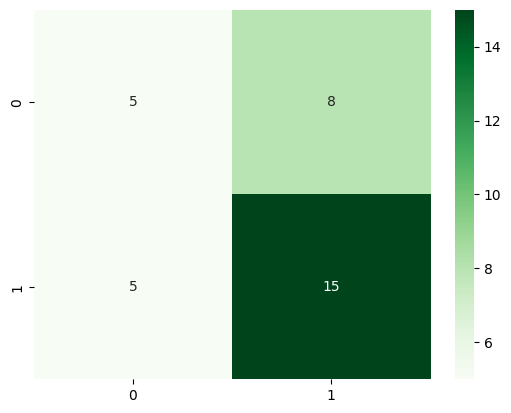

In [233]:
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens')

In [234]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.65      0.75      0.70        20

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33



In [235]:
#precision: proporção de exemplos positivos classificados corretamente em #relação a todos os exemplos classificados como positivos
#vdd positivos / (vdd positivos + falsos positivos)
#recall: sensibilidade; proporção de exemplos positivos corretamente classificados pelo modelo em relação a todos os exemplos que realmente pertencem à classe positiva
# vdd positivos / (vdd positivos + falsos negativos)
#f1-score: 2* (precision*recall)/(precision + recall)
# média harmonica entre as 2 metricas acima, fornecendo equilibrio
#support: número de ocorrências reais da classe no conjunto de dados de teste
#médias das métricas (precisão, recall, f1-score) calculadas para cada classe.
#A média ponderada (weighted avg) leva em consideração o suporte de cada classe
#A média macro (macro avg) não leva em consideração o desequilíbrio de classe5

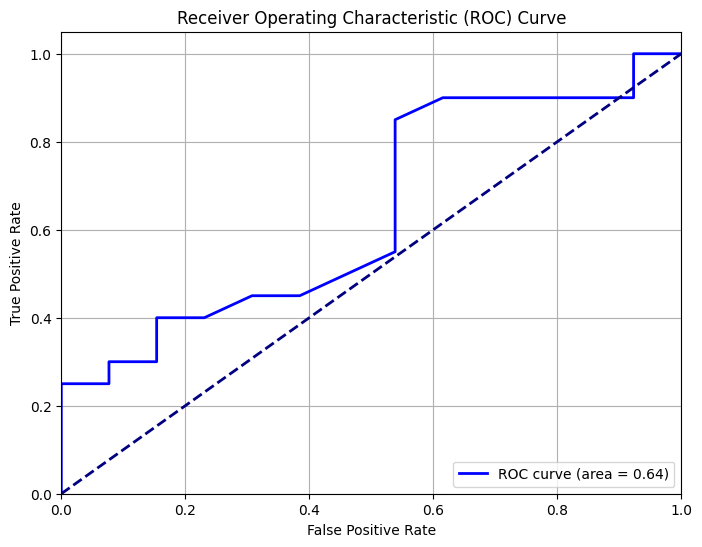

In [242]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predizer as probabilidades para a classe positiva
y_prob1 = forest.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = roc_auc_score(y_test, y_prob1)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### 4.2.2 Logistic Regression Model

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [186]:
log_reg =  LogisticRegression()

In [187]:
log_reg.fit(X_train_s,y_train)

LogisticRegression()

In [188]:
log_reg.score(X_train_s,y_train)

0.9545454545454546

In [189]:
param_grid = {
    'penalty' : ['l1','l2','elasticnet'],
    'C': [0.001,0.01,0.1,1,10],
    'solver':['lbfgs','liblinear','saga'],
    'max_iter':[100,1000,2500,5000]
}
log_reg_grid = GridSearchCV(log_reg,param_grid,cv = 5)
log_reg_grid.fit(X_train_s,y_train)

C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'saga']})

In [190]:
log_reg_grid.best_estimator_

LogisticRegression(C=0.001, solver='liblinear')

In [191]:
log_reg_grid.score(X_test_s,y_test)

0.6666666666666666

In [192]:
y_pred2 = log_reg_grid.predict(X_test_s)

In [193]:
conf_matrix2 = confusion_matrix(y_test,y_pred2)

<Axes: >

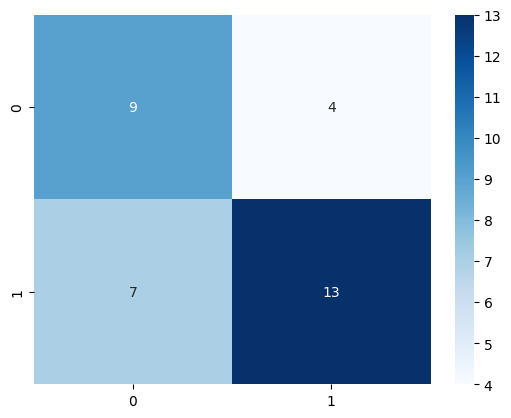

In [194]:
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')

In [195]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.76      0.65      0.70        20

    accuracy                           0.67        33
   macro avg       0.66      0.67      0.66        33
weighted avg       0.69      0.67      0.67        33



C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


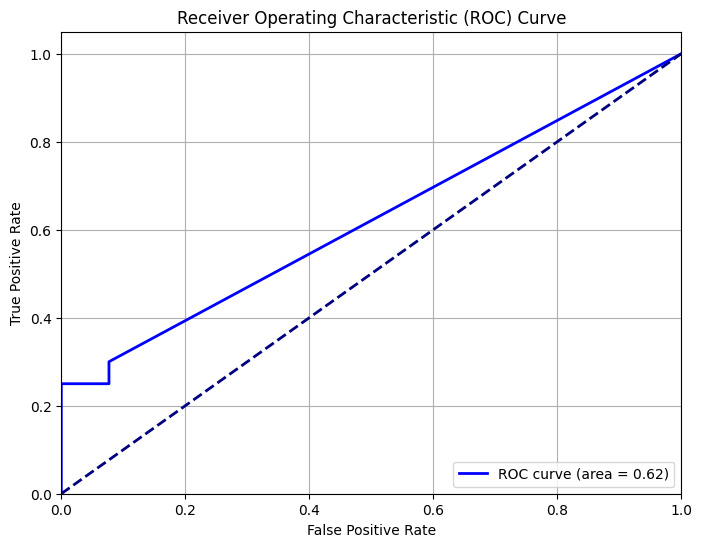

In [243]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predizer as probabilidades para a classe positiva
y_prob1 = log_reg.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = roc_auc_score(y_test, y_prob1)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### 4.2.3 GradientBoosting Classifier Model

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
gbr = GradientBoostingClassifier()

In [247]:
gbr.fit(X_train,y_train)

GradientBoostingClassifier()

In [248]:
gbr.score(X_test,y_test)

0.6666666666666666

In [249]:
gbr2 = GradientBoostingClassifier()

In [250]:
gbr2.fit(X_train_s,y_train)

GradientBoostingClassifier()

In [251]:
gbr2.score(X_test_s,y_test)

0.5757575757575758

In [252]:
cross_val_score(gbr,X_train,y_train,cv=5).mean()

0.7726495726495727

In [ ]:
param_grid = {
    'n_estimators' : [10,50,100,500],
    'learning_rate': [0.0001,0.001,0.01,0.1,1.0],
    'max_depth':[3,5,7,9]  
}
gbr3 = GridSearchCV(gbr,param_grid,cv = 5)
gbr3.fit(X_train,y_train)

In [ ]:
gbr3.best_params_

In [ ]:
gbr3.score(X_test,y_test)

In [ ]:
y_pred3 = gbr3.predict(X_test)

In [ ]:
conf_matrix3 = confusion_matrix(y_test,y_pred3)

In [ ]:
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Reds')

In [259]:
param_grid = {
    'n_estimators' : [10,50,100,500],
    'learning_rate': [0.0001,0.001,0.01,0.1,1.0],
    'max_depth':[3,5,7,9]  
}
gbr4 = GridSearchCV(gbr2,param_grid,cv = 3)
gbr4.fit(X_train_s,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 50, 100, 500]})

In [260]:
gbr4.score(X_test_s,y_test)

0.5454545454545454

In [261]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.71      0.75      0.73        20

    accuracy                           0.67        33
   macro avg       0.65      0.64      0.65        33
weighted avg       0.66      0.67      0.66        33



In [ ]:
y_pred3_1= gbr4.predict(X_test_s)

In [ ]:
print(classification_report(y_test,y_pred3_1))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.61      0.70      0.65        20

    accuracy                           0.55        33
   macro avg       0.50      0.50      0.50        33
weighted avg       0.53      0.55      0.53        33



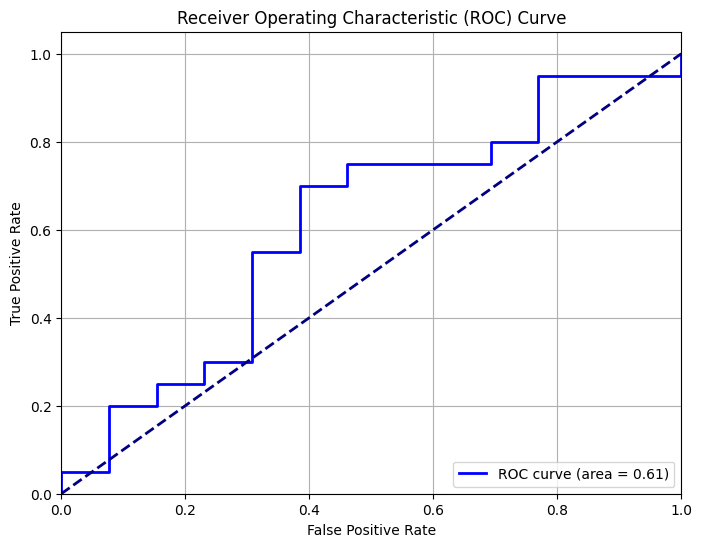

In [290]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predizer as probabilidades para a classe positiva
y_prob1 = gbr.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = roc_auc_score(y_test, y_prob1)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### 4.2.4 SVC Model

In [292]:
from sklearn.svm import SVC

In [304]:
svc = SVC(probability=True, random_state=42)

In [305]:
svc.fit(X_train_s,y_train)

SVC(probability=True, random_state=42)

In [306]:
svc.score(X_test_s,y_test)

0.6363636363636364

In [307]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}
svc2 = GridSearchCV(svc,param_grid,cv = 3)
svc2.fit(X_train_s,y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [308]:
svc2.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [309]:
svc2.score(X_test_s,y_test)

0.6363636363636364

In [310]:
y_pred4 = svc2.predict(X_test_s)

In [311]:
conf_matrix4 = confusion_matrix(y_test,y_pred4)

<Axes: >

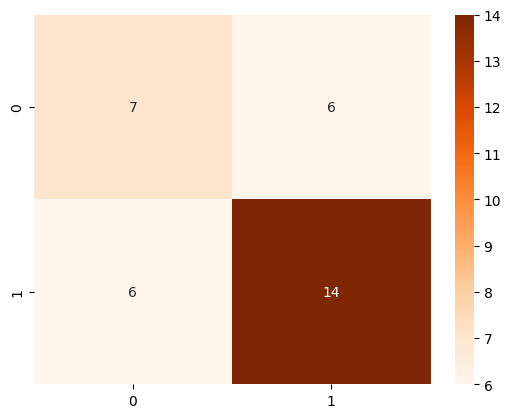

In [316]:
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Oranges')

In [313]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.70      0.70      0.70        20

    accuracy                           0.64        33
   macro avg       0.62      0.62      0.62        33
weighted avg       0.64      0.64      0.64        33



C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


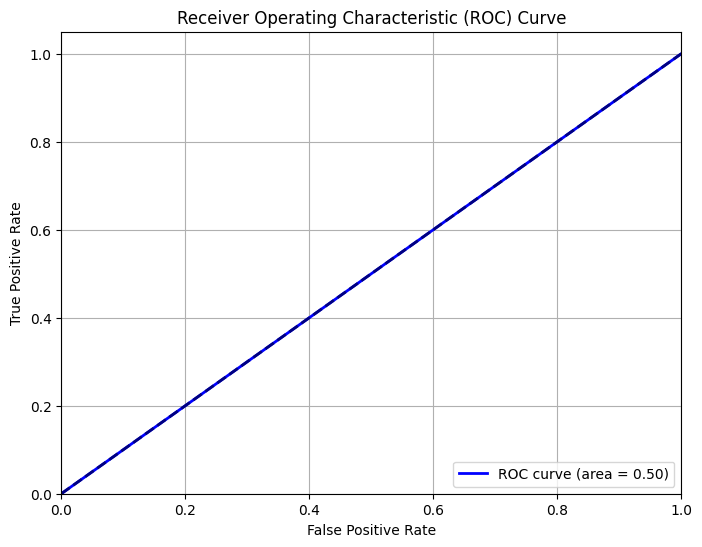

In [314]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predizer as probabilidades para a classe positiva
y_prob1 = svc.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = roc_auc_score(y_test, y_prob1)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_s,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test_s,y_test)

0.6363636363636364

In [ ]:
y_pred5 = knn.predict(X_test_s)

In [ ]:
conf_matrix5 = confusion_matrix(y_test,y_pred5)

<Axes: >

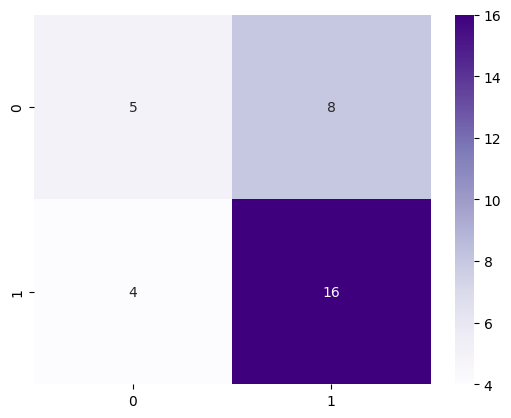

In [ ]:
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Purples')

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.67      0.80      0.73        20

    accuracy                           0.64        33
   macro avg       0.61      0.59      0.59        33
weighted avg       0.62      0.64      0.62        33



C:\Users\catar\anaconda3\envs\teste\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


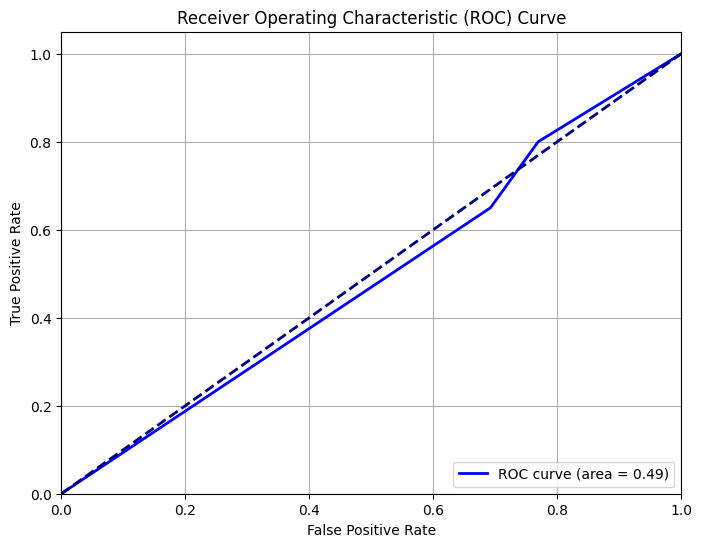

In [317]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predizer as probabilidades para a classe positiva
y_prob1 = knn.predict_proba(X_test)[:, 1]
# Calcular a curva ROC
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = roc_auc_score(y_test, y_prob1)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
knn_params = {
    "n_neighbors" : range(1,30,2),
    "weights" : ["uniform","distance"],
    "metric" : ["euclidean","manhattan","minkowski"],
    "leaf_size" : range(1,50,5)
}

knn2 = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
grid_search_knn = GridSearchCV(estimator=knn2,param_grid=knn_params,cv=cv,scoring="accuracy",error_score=0)
grid_results = grid_search_knn.fit(X_train_s,y_train)

#best model
final_model = knn2.set_params(**grid_results.best_params_)
final_model.fit(X_train_s,y_train)
y_pred6 = final_model.predict(X_test_s)

#summarize results
print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.65      0.75      0.70        20

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33

[[ 5  8]
 [ 5 15]]
{'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


        Feature  Importance
4           AFP    0.101762
14          ALP    0.077472
5    Hemoglobin    0.065168
9       Albumin    0.056864
12          AST    0.047967
..          ...         ...
46  Obesity_Yes    0.000518
56     NASH_Yes    0.000278
47  Hemochro_No    0.000232
54      HIV_Yes    0.000000
31     HBeAg_No    0.000000

[80 rows x 2 columns]


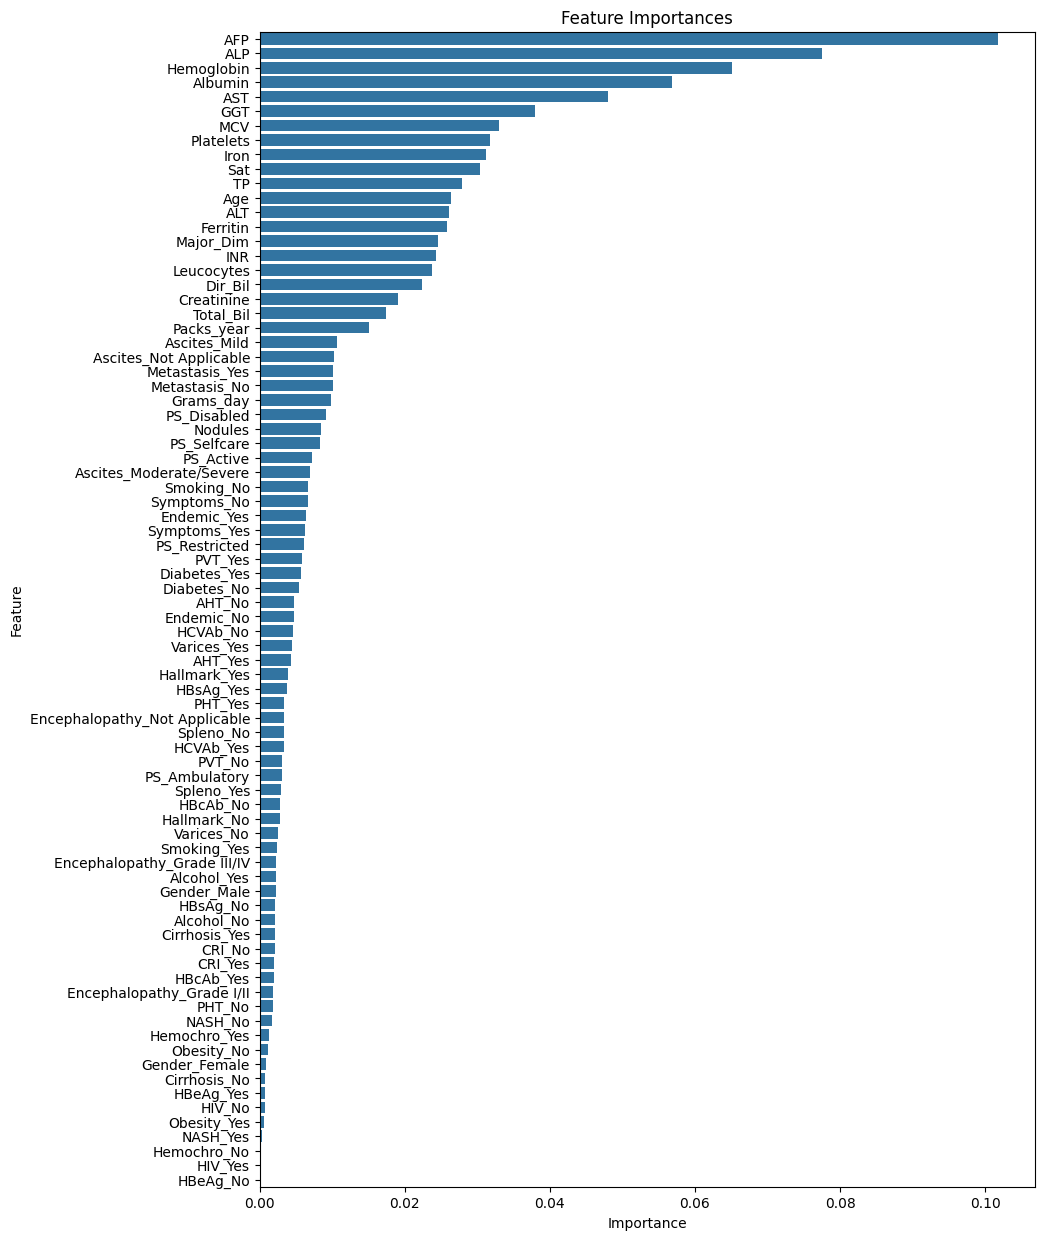

In [ ]:

v_important1 = forest2.feature_importances_

# Criar um DataFrame para visualizar as importâncias das features
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': v_important1
}).sort_values(by='Importance', ascending=False)

print(features_df)

# Plotar as importâncias das features
plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.show()

                      Feature  Importance
5                  Hemoglobin    0.722837
69                  PS_Active    0.662895
43                Diabetes_No    0.615393
11                        ALT    0.585204
74  Encephalopathy_Grade I/II    0.560077
..                        ...         ...
44               Diabetes_Yes   -0.615393
4                         AFP   -0.717951
0                         Age   -0.765284
12                        AST   -1.101034
14                        ALP   -1.354727

[80 rows x 2 columns]


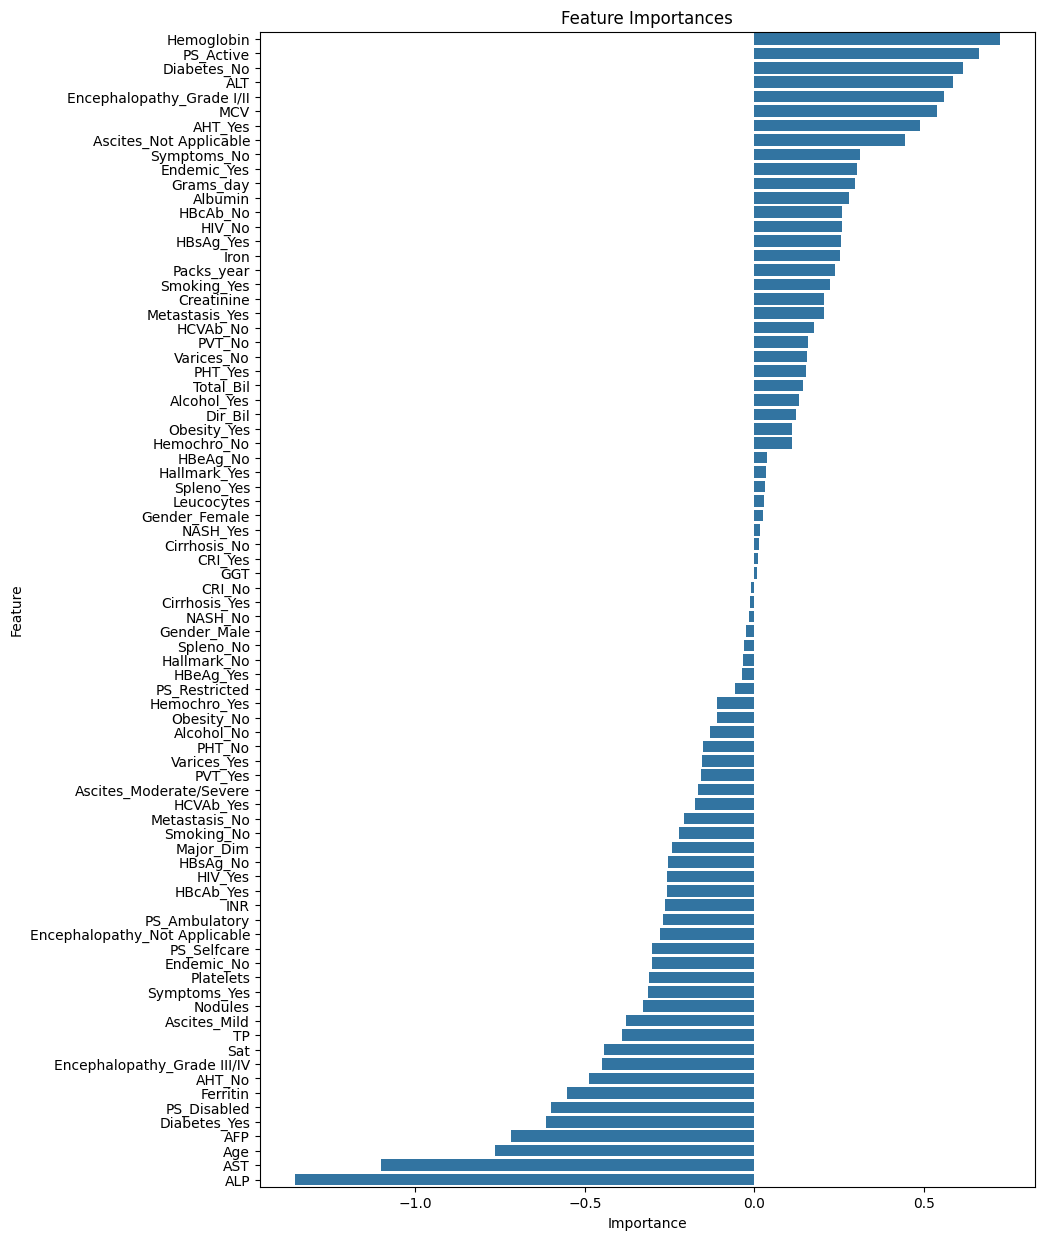

In [ ]:
# Obter coeficientes das features
v_important2 = log_reg.coef_[0]

# Criar um DataFrame para visualizar as importâncias das features
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': v_important2
}).sort_values(by='Importance', ascending=False)

print(features_df)

# Plotar as importâncias das features
plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.show()

                   Feature  Importance
4                      AFP    0.249097
14                     ALP    0.095779
5               Hemoglobin    0.082071
22                Ferritin    0.068403
0                      Age    0.067567
..                     ...         ...
47             Hemochro_No    0.000000
50                 AHT_Yes    0.000000
53                  HIV_No    0.000000
55                 NASH_No    0.000000
79  Ascites_Not Applicable    0.000000

[80 rows x 2 columns]


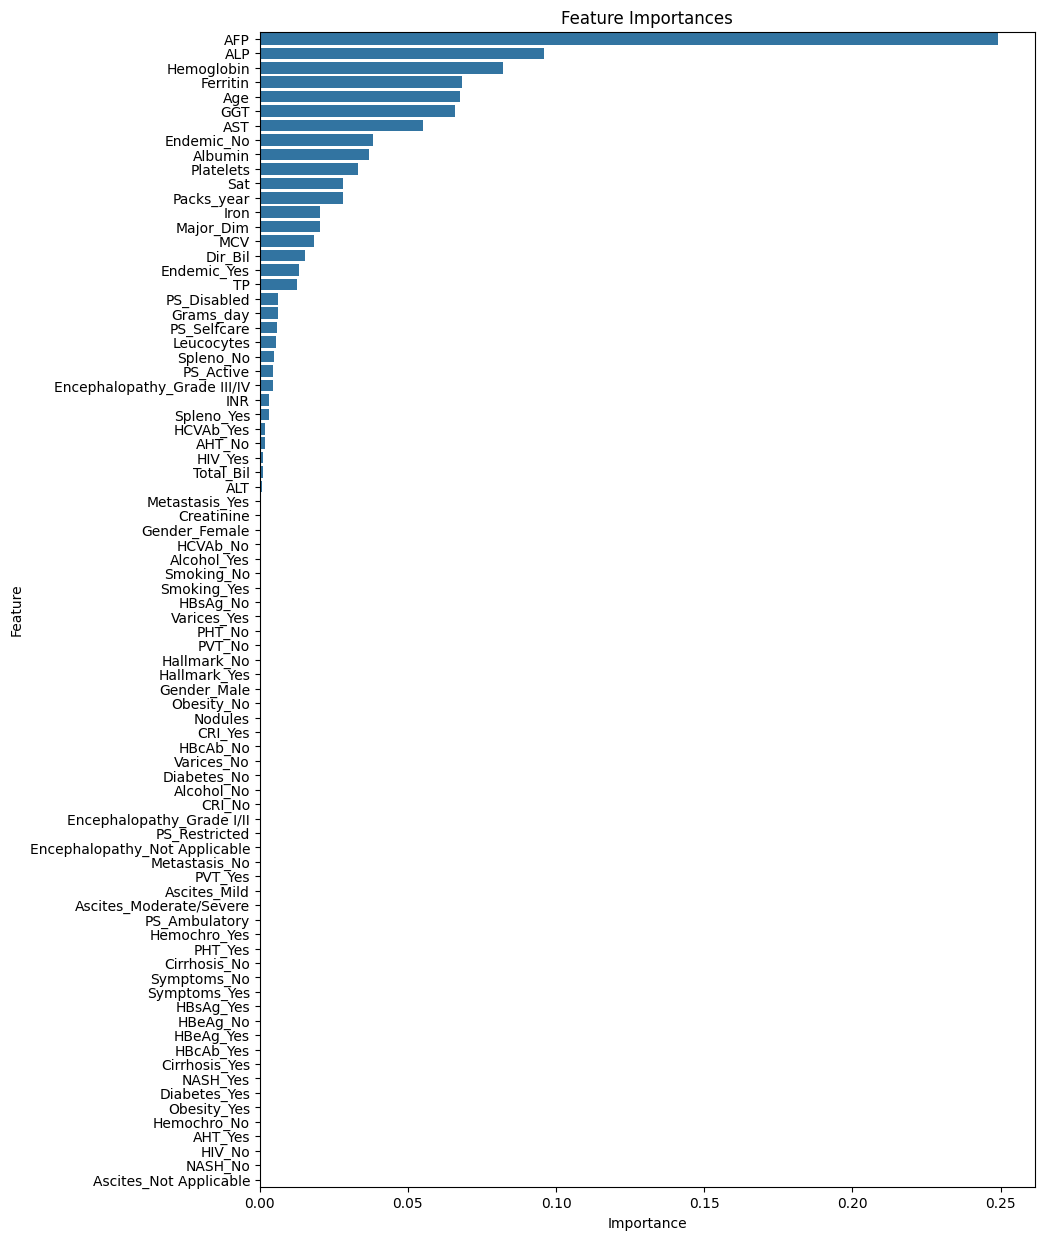

In [ ]:
v_important3 = gbr2.feature_importances_

# Criar um DataFrame para visualizar as importâncias das features
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': v_important3
}).sort_values(by='Importance', ascending=False)

print(features_df)

# Plotar as importâncias das features
plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.show()

          Feature  Importance
33       HBcAb_No    0.057576
34      HBcAb_Yes    0.057576
70  PS_Ambulatory    0.036364
35       HCVAb_No    0.030303
36      HCVAb_Yes    0.030303
..            ...         ...
16     Creatinine   -0.039394
12            AST   -0.042424
10      Total_Bil   -0.045455
11            ALT   -0.048485
4             AFP   -0.057576

[80 rows x 2 columns]


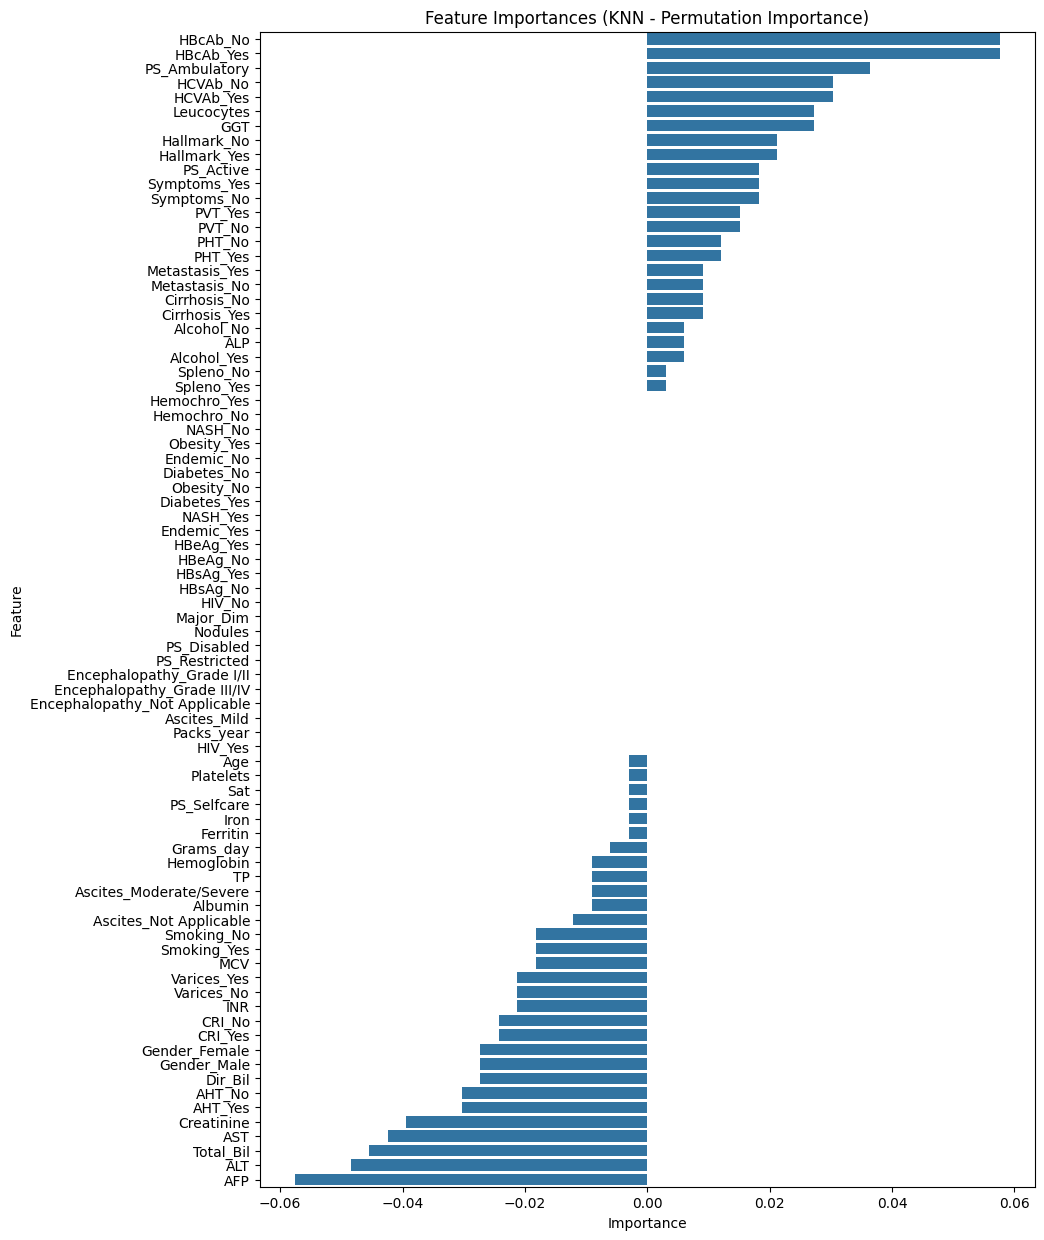

In [ ]:
# Calcular a importância das features usando permutation importance
from sklearn.inspection import permutation_importance
result = permutation_importance(knn, X_test_s, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Criar um DataFrame para visualizar as importâncias das features
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(features_df)
plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances (KNN - Permutation Importance)')
plt.show()

<Axes: >

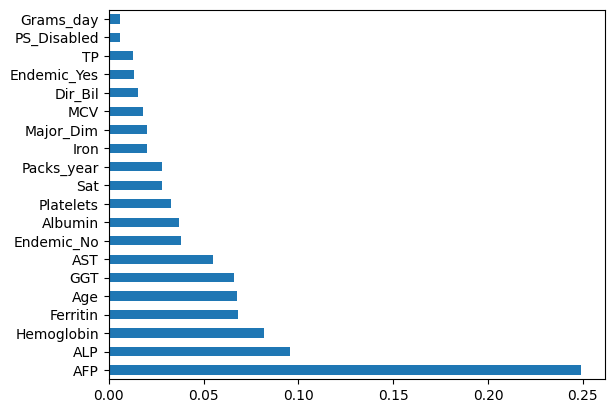

In [ ]:
(pd.Series(v_important3,index=X_train.columns)
    .nlargest(20)
    .plot(kind='barh'))

<Axes: >

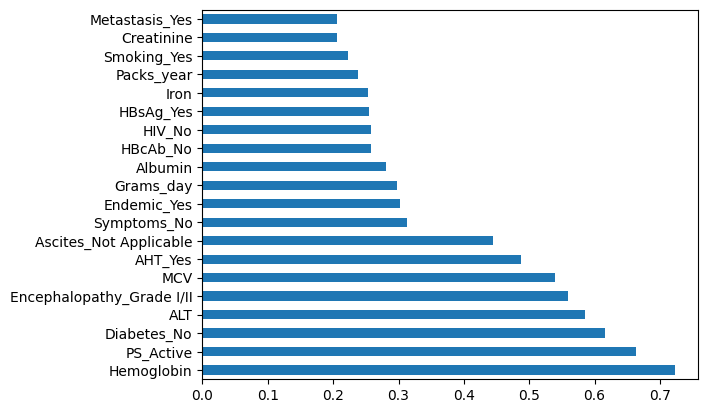

In [ ]:
(pd.Series(v_important2,index=X_train.columns)
    .nlargest(20)
    .plot(kind='barh'))

#### 4.3 Model Evaluation <a id='Model_evaluation'></a>

In [318]:
X_test_a,y_test_a = train_data2.drop(['Class'],axis=1),train_data2['Class']

NameError: name 'train_data2' is not defined

In [319]:
# Avaliar o modelo
train_accuracy = pipeline.score(X_train_a, y_train_a)
test_accuracy = pipeline.score(X_test_a, y_test_a)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

NameError: name 'pipeline' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Fazer previsões no conjunto de teste
y_test_pred = pipeline.predict(X_test_a)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test_a, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test_a, y_test_pred))

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

### 5. Feature engineering <a id='Feature_engineering'></a>

[Back_to_top](#table_of_contents)

<Axes: >

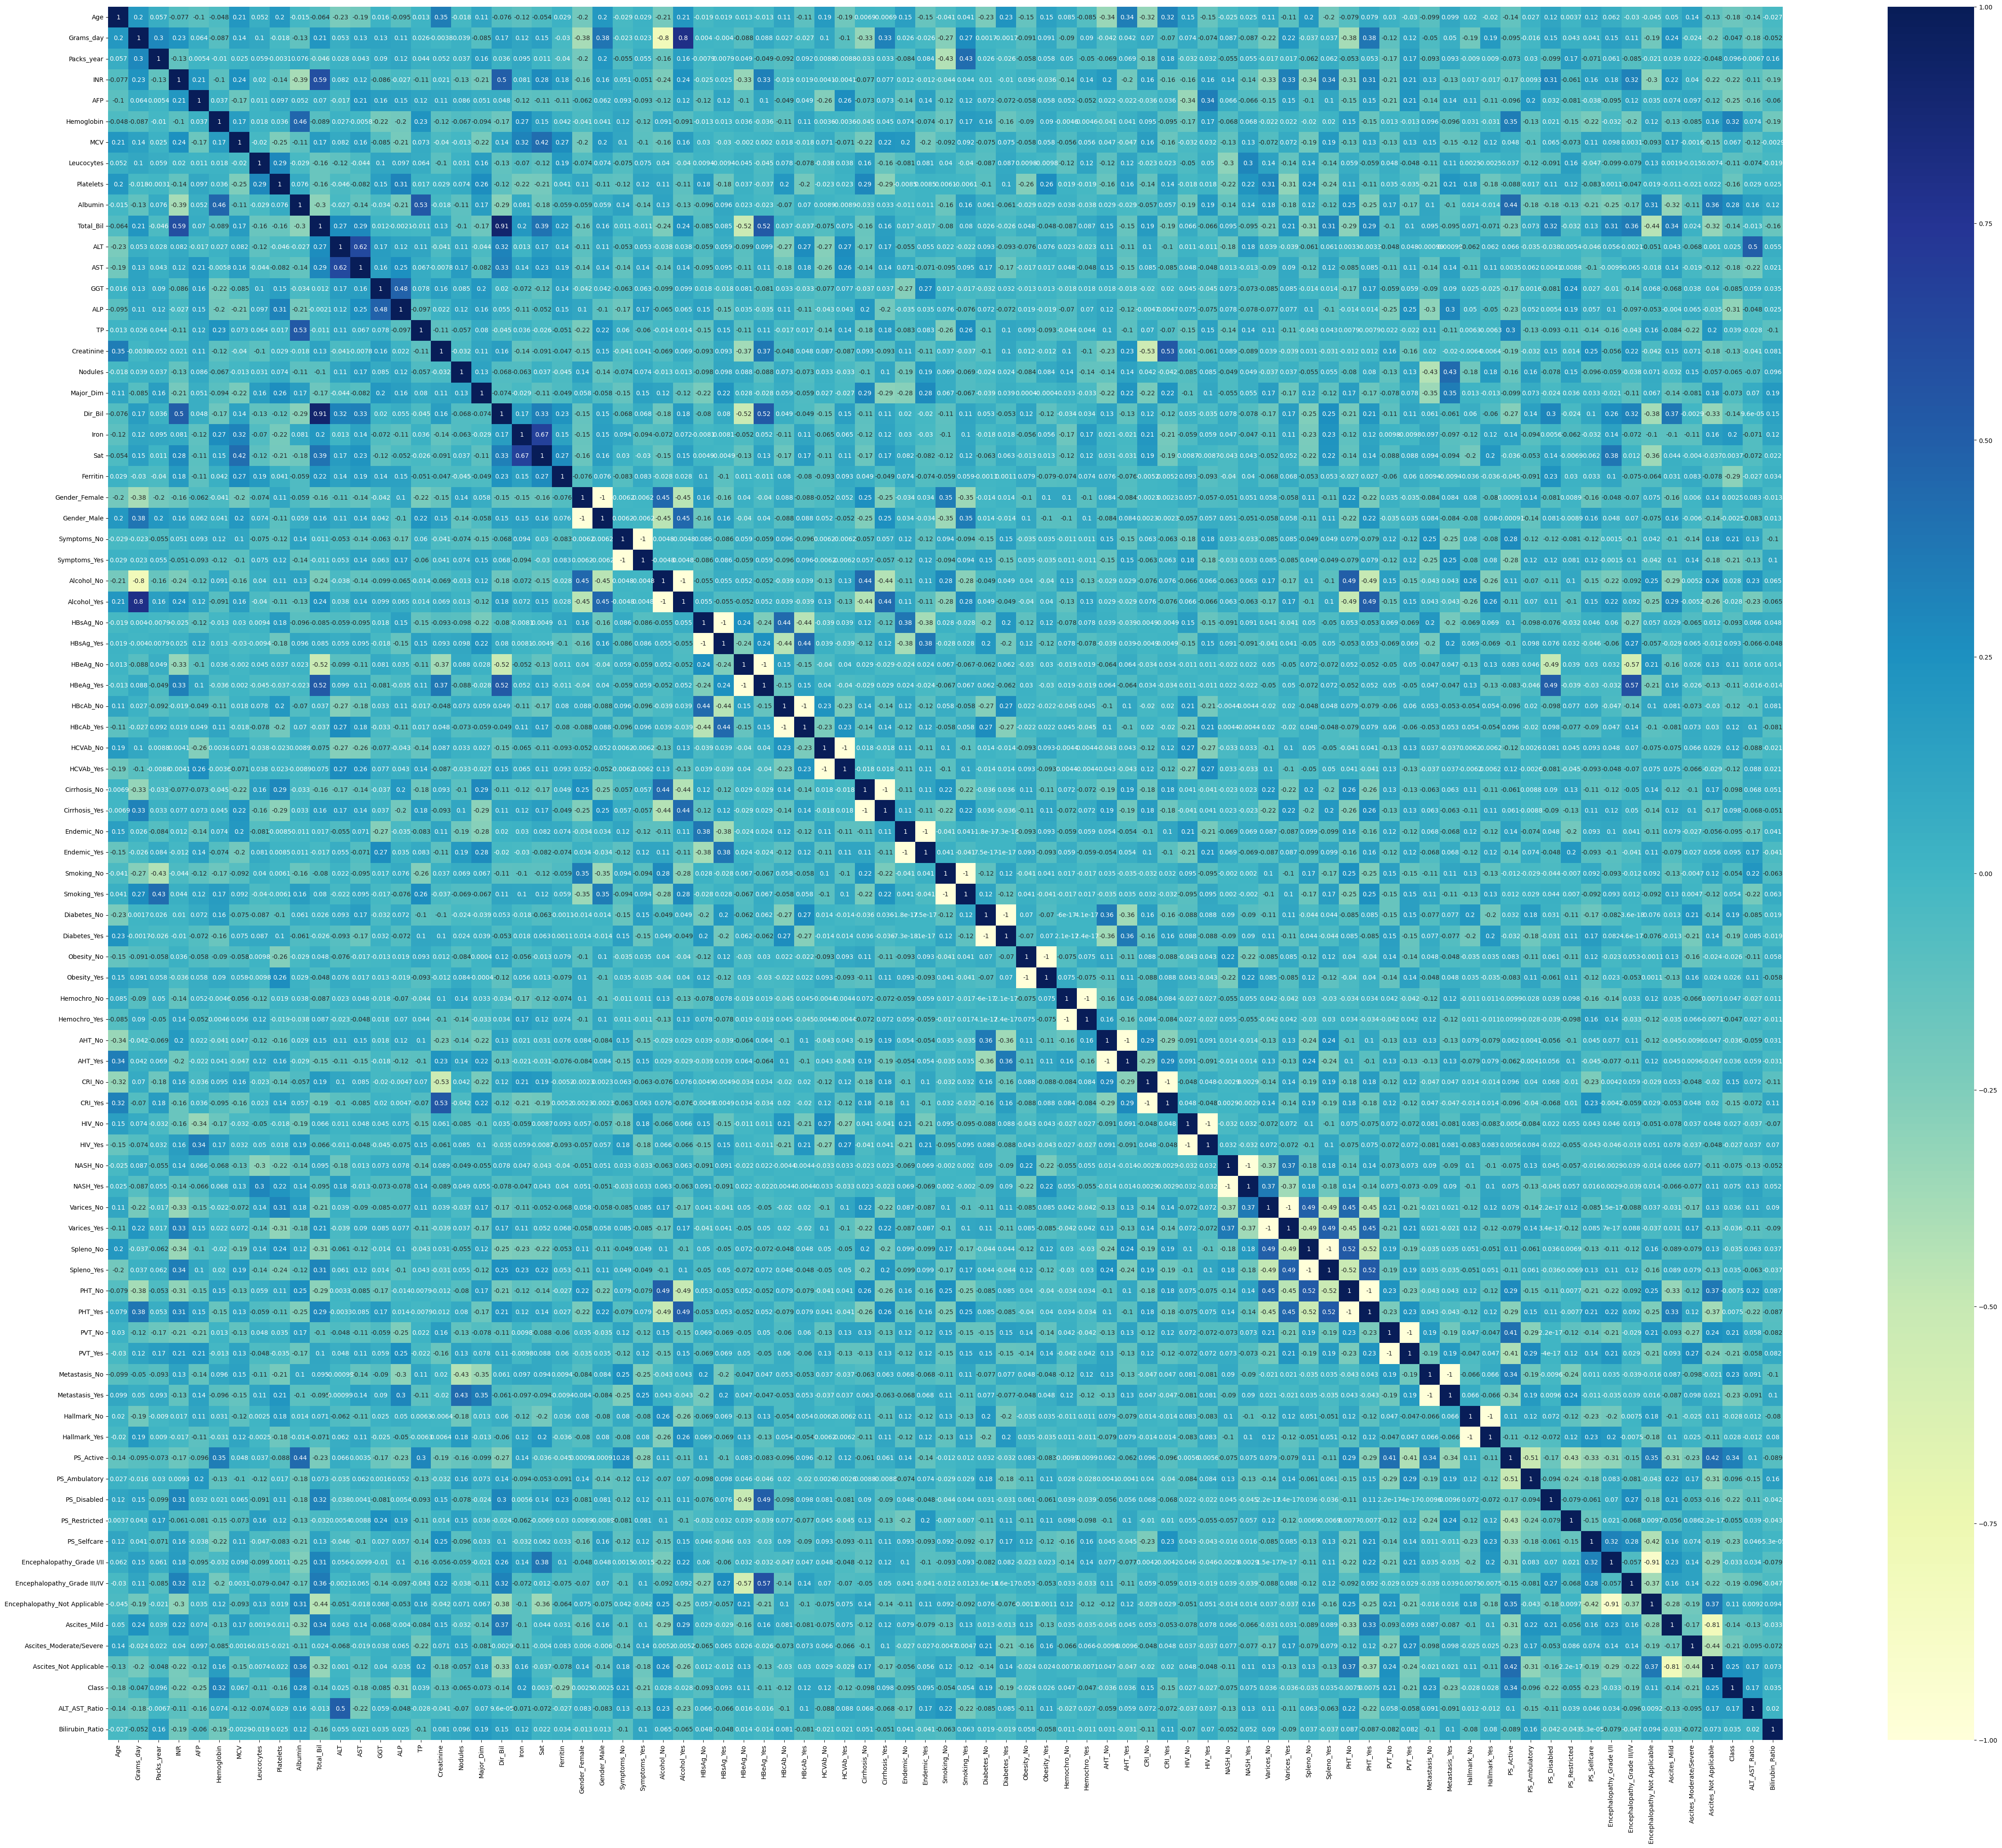

In [595]:
plt.figure(figsize=(60,50))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [13]:
data_models2 = hcc_data.copy()

NameError: name 'hcc_data' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Limpar valores na coluna 'Class'
data_models2['Class'] = data_models2['Class'].str.strip()
data_models2['Class'] = data_models2['Class'].str.title()
data_models2['Class'] = data_models2['Class'].map({'Lives':1, 'Dies':0})

In [ ]:
# Criação de razão entre ALT e AST
data_models2['ALT_AST_Ratio'] = data_models2['ALT'] / data_models2['AST']
data_models2['Dir_Total_Bil_Ratio'] = data_models2['Dir_Bil'] / data_models2['Total_Bil']


In [ ]:
X1 = data_models2.drop(['Class'],axis=1) #features
y1 = data_models2['Class'] #target

# One-hot encode
X1 = pd.get_dummies(X1)

In [ ]:
X1_train,y1_train,X1_test,y1_test = train_test_split(X1,y1,test_size=0.2)

In [ ]:
train_data2 = X1.join(y1)

In [ ]:
plt.figure(figsize=(88,70))
sns.heatmap(train_data2.corr(),annot=True,cmap="YlGnBu")

### 6. Model training <a id='Model_training'></a>

[Back_to_top](#table_of_contents)

#####    6.1. Decision tree <a id='Decision_tree'></a>

In [427]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree = DecisionTreeClassifier()
tree.fit(X_train_s,y_train)

DecisionTreeClassifier()

In [428]:
from sklearn.metrics import classification_report, accuracy_score


y_pred = tree.predict(X_test_s)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           1       0.89      0.67      0.76        24

    accuracy                           0.70        33
   macro avg       0.68      0.72      0.67        33
weighted avg       0.77      0.70      0.71        33

Accuracy: 0.696969696969697


In [481]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = {
    'max_depth': [1,2,3,4,5],
    'max_features': [1,2,3,4],
    'splitter': ['best','random'],
    'criterion':['gini','entropy']
}
cross_validation_tree = StratifiedKFold(n_splits=10)
#grid_search_tree = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5)

y_pred6 = grid_search_tree.predict(X_test_s)

grid_search_tree = GridSearchCV(tree,
                           param_grid=param_grid,
                           cv=cross_validation_tree)
grid_search_tree.fit(X_train_s, y_train)

accuracy = accuracy_score(y_test,y_pred6)
print("Best parameters:", grid_search_tree.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_tree.best_score_))
print("Accuracy on test set: {:.2f}".format(accuracy))

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'splitter': 'random'}
Best cross-validation score: 0.71
Accuracy on test set: 0.70


[Text(0.46296296296296297, 0.9375, 'x[14] <= -0.235\ngini = 0.483\nsamples = 132\nvalue = [54, 78]'),
 Text(0.23148148148148148, 0.8125, 'x[15] <= -0.542\ngini = 0.354\nsamples = 74\nvalue = [17, 57]'),
 Text(0.07407407407407407, 0.6875, 'x[16] <= -0.73\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.037037037037037035, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1111111111111111, 0.5625, 'x[6] <= -0.634\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.07407407407407407, 0.4375, 'x[11] <= -0.381\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.037037037037037035, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1111111111111111, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.14814814814814814, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3888888888888889, 0.6875, 'x[4] <= -0.262\ngini = 0.234\nsamples = 59\nvalue = [8, 51]'),
 Text(0.2962962962962963, 0.5625, 'x[5] <= 2.215\ngini = 0.122\nsamples = 46\nvalue = [3, 4

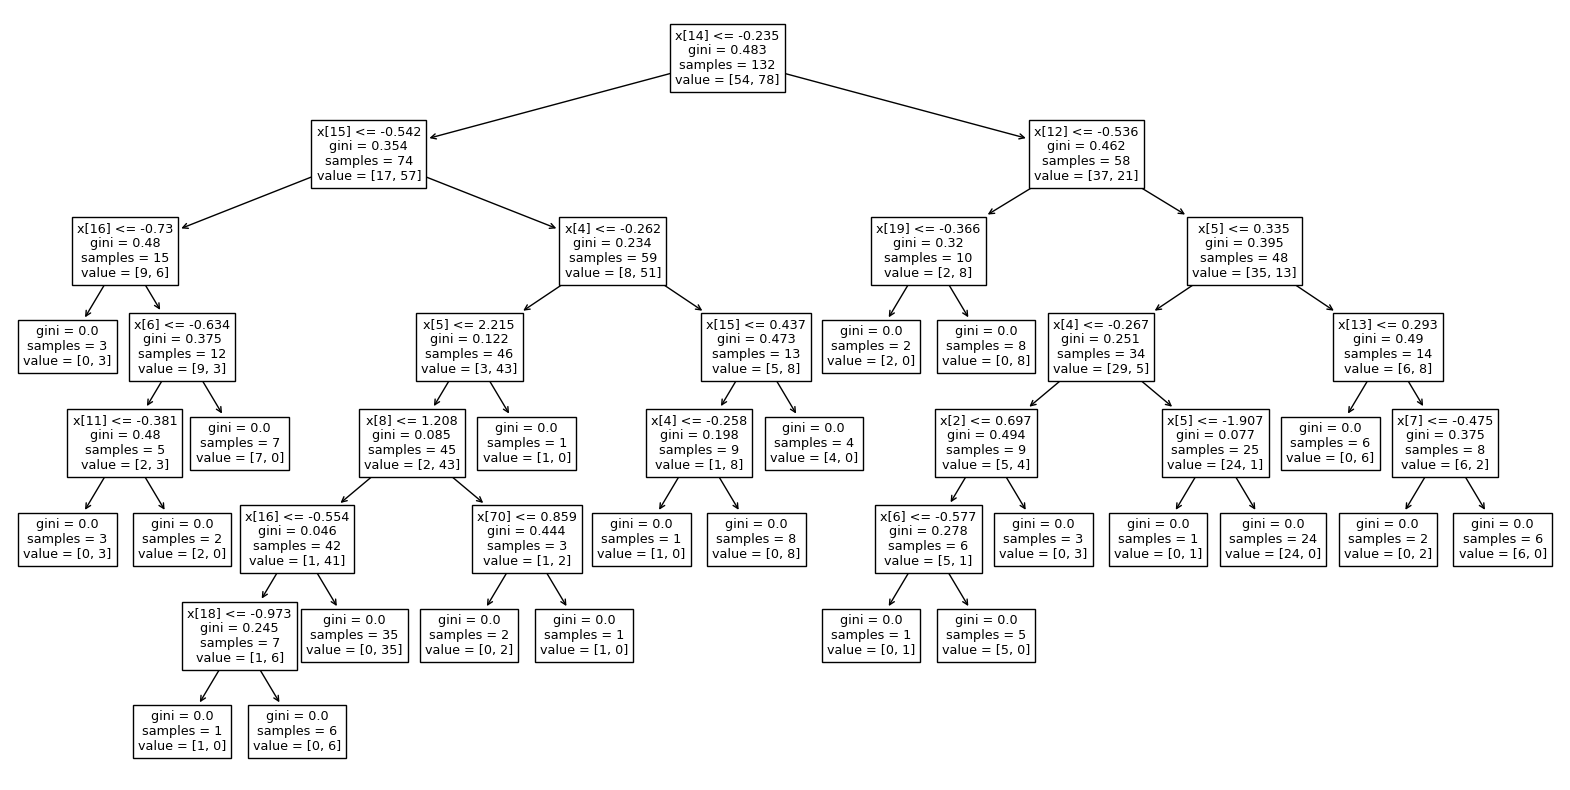

In [483]:
plt.figure(figsize=(20, 10))
plot_tree(tree)

##### 6.2. KNN   <a id='KNN'></a>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [10]:
scaler = StandardScaler()

In [11]:
X1_train_scaled = scaler.fit_transform(X1_train)

NameError: name 'X1_train' is not defined

In [574]:
X1_test_scaled = scaler.fit_transform(X1_test)

In [575]:
knn = KNeighborsClassifier(n_neighbors=12)

In [576]:
knn.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=12)

In [577]:
y1_pred2 = knn.predict(X1_test)

In [580]:
knn.score(X1_test,y1_test)

0.5757575757575758

##### 6.3. Comparing Algorithm performance <a id='Comparing_algorithm_performance'></a>

### 7. Tuning <a id='Tuning'></a>
[Back_to_top](#table_of_contents)